In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data manipulation
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_datetime64_any_dtype

#maths
import numpy as np
from scipy.stats import kstest, norm

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#models


#logs beautifier
from IPython.display import display, Markdown, Latex

## EDA

In [ ]:
def numerical_distribution_analysis(x,column):
  skew = x[column].skew(skipna = True)
  kurtosis = x[column].kurtosis(skipna = True)
  loc, scale = norm.fit(x[column])
  n = norm(loc=loc, scale=scale)
  normality = kstest(x[column], n.cdf)

  plt.hist(x[column], bins=np.arange(x[column].min(), x[column].max()+0.2, 0.2), rwidth=0.5)
  x_axis = np.arange(x[column].min(), x[column].max()+0.2, 0.2)
  plt.plot(x_axis, 350*n.pdf(x_axis))
  plt.show()
  if (skew >= -0.5 and skew <= 0.5):
    s_str = f"La distribucion de **{column}** es <ins>aceptablemente simetrica</ins> **(skew:{round(skew,3)})**.\n"
  if (skew >= -1 and skew < -0.5):
    s_str = f"La distribucion de **{column}** es <ins>moderadamente oblicua a la derecha</ins> **(skew:{round(skew,3)})**.\n"
  if (skew > 0.5 and skew <= 1):
    s_str = f"La distribucion de **{column}** es <ins>moderadamente oblicua a la izquierda</ins> **(skew:{round(skew,3)})**.\n"
  if (skew < -1):
    s_str = f"La distribucion de **{column}** es <ins>considerablemente oblicua a la derecha</ins> **(skew:{round(skew,3)})**.\n"
  if (skew > 1):
    s_str = f"La distribucion de **{column}** es <ins>considerablemente oblicua a la izquierda</ins> **(skew:{round(skew,3)})**.\n"

  if (kurtosis > 3):
    k_str = f"La distribucion de **{column}** es <ins>leptokurtica</ins> **(kurtosis:{round(kurtosis,3)})**.\n"
  if (kurtosis == 3):
    k_str = f"La distribucion de **{column}** es <ins>mesokurtica</ins> **(kurtosis:{round(kurtosis,3)})**.\n"
  else:
    k_str = f"La distribucion de **{column}** es <ins>platokurtica</ins> **(kurtosis:{round(kurtosis,3)})**.\n"

  if (normality[1] > 0.05):
    n_str = f"El **p-value: ({normality[1]})** de la prueba Kolmogorov-Smirnov es mayor al nivel de significancia de 0.05,\n por lo tanto falla en rechazar la hipotesis nula, la muestra proviene de una distribucion normal.\n\n"
  if (normality[1] < 0.05):
    n_str = f"El **p-value: ({normality[1]})** de la prueba Kolmogorov-Smirnov es menor al nivel de significancia de 0.05,\n por lo tanto se rechaza la hipotesis nula, la muestra no proviene de una distribucion normal.\n\n"

  display(Markdown(f"## Analisis estadistico de *{column}* \n\n - {s_str}\n\n- {k_str}\n\n- {n_str}\n\n"))
  f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
  v_dist_1 = x[column].values
  sns.histplot(v_dist_1, ax=ax1, kde=True)
  mean=x[column].mean()
  median=x[column].median()
  mode=x[column].mode().values[0]
  ax1.axvline(mean, color='r', linestyle='--', label="Mean")
  ax1.axvline(median, color='g', linestyle='-', label="Mean")
  ax1.axvline(mode, color='b', linestyle='-', label="Mode")
  ax1.legend()
  plt.show()

In [ ]:
def basic_column_analysis(x,column):
  dpl = f"## Analisis estadistico de *{column}*\n\n Dimensiones:{x[column].shape}\n\nValores Nulos:{x[column].isnull().sum()}\n\nValores Unicos:{len(x[column].unique())}\n\nTipo: {x[column].dtype}\n\n"
  display(Markdown(dpl))
  sns.histplot(x=x[column], palette="ch:.25")
  plt.show()


In [ ]:
def basic_column_desc(x,column):
  dpl = f"## Analisis estadistico de *{column}*\n\n Dimensiones:{x[column].shape}\n\nValores Nulos:{x[column].isnull().sum()}\n\nValores Unicos:{len(x[column].unique())}\n\nTipo: {x[column].dtype}\n\nTop:\n\n{x[column].value_counts()}\n\n"
  display(Markdown(dpl))
  print(x[column].describe())

In [ ]:
def create_agg_feats(grp_col, feat_name, data, operation='sum'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..

    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.

        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.

        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    data[feat_1] = data.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    data[feat_2] = data.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    data[feat_3] = data.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    data[feat_4] = data.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    data[feat_5] = data.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    data[feat_6] = data.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Claim_Duration"
    data[feat_7] = data.groupby(grp_col)['ClaimDuration'].transform(operation)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AAD/Final/Train-1542865627584.csv")
inpatient_train = pd.read_csv("/content/drive/MyDrive/AAD/Final/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("/content/drive/MyDrive/AAD/Final/Train_Outpatientdata-1542865627584.csv")
beneficiary_train = pd.read_csv("/content/drive/MyDrive/AAD/Final/Train_Beneficiarydata-1542865627584.csv", parse_dates=['DOB'])

In [ ]:
print('Inpatient_data', inpatient_train.shape)
print('Outpatient_data', outpatient_train.shape)
print('Beneficiary_data', beneficiary_train.shape)
print('y_data', train.shape)

Inpatient_data (40474, 30)
Outpatient_data (517737, 27)
Beneficiary_data (138556, 25)
y_data (5410, 2)


In [ ]:
inpatient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
outpatient_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
#Data Merge
#Append inpatient and outpatient to do total claims
inpatient_train["Type"] = 0
outpatient_train["Type"] = 1
append = [inpatient_train, outpatient_train]
appended_in_out_data = pd.concat(append)
display(appended_in_out_data)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Type
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Merge by provider
claims_providers = pd.merge(appended_in_out_data, train, on="Provider")

# Merge by Beneficiary
claims_providers = pd.merge(claims_providers, beneficiary_train, on="BeneID")


In [ ]:
claims_providers.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Type', 'PotentialFraud', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCon

In [ ]:
claims_providers.shape

(558211, 56)

<ipython-input-16-23574e10f46c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = claims_providers.corr()


<Axes: >

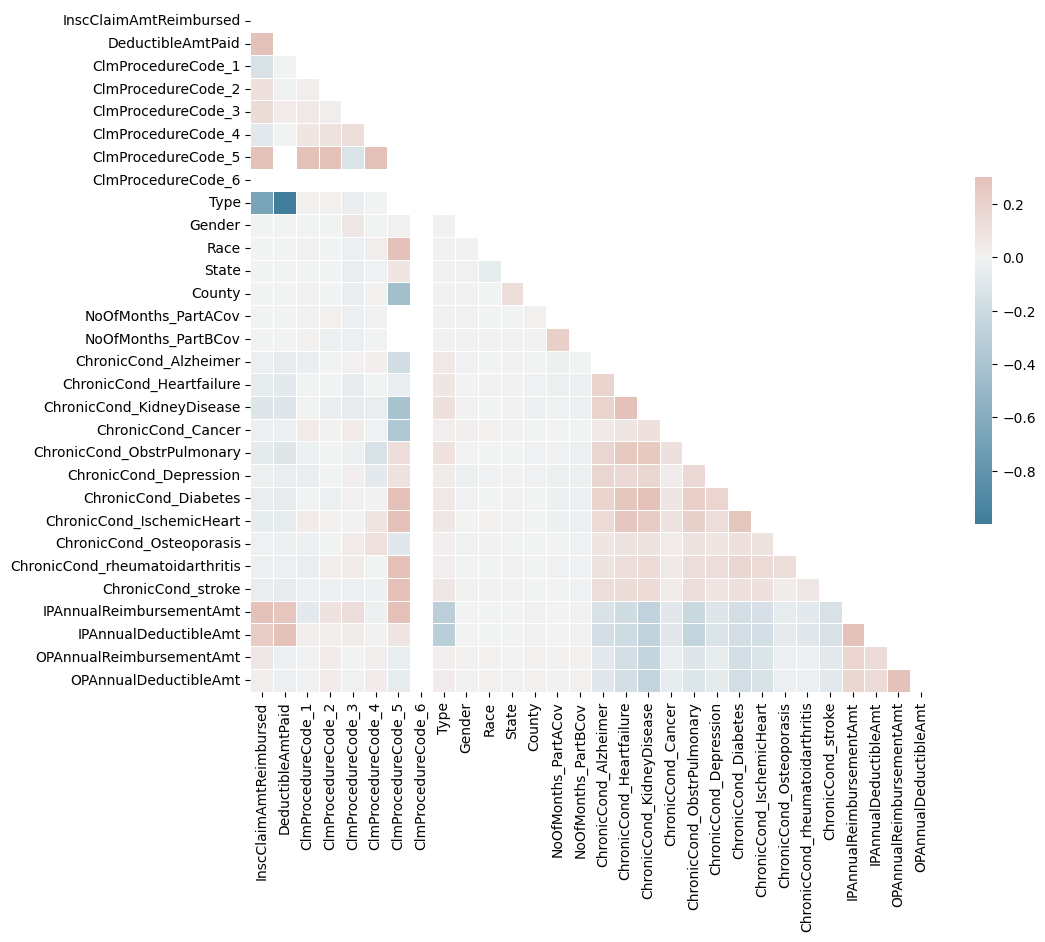

In [ ]:
corr = claims_providers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
for col in claims_providers.columns:
  basic_column_desc(claims_providers,col)

## Analisis estadistico de *BeneID*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:138556

Tipo: object

Top:

BENE118316    29
BENE42721     29
BENE59303     29
BENE44241     28
BENE36330     28
              ..
BENE125274     1
BENE138603     1
BENE93251      1
BENE110804     1
BENE153476     1
Name: BeneID, Length: 138556, dtype: int64



count         558211
unique        138556
top       BENE118316
freq              29
Name: BeneID, dtype: object


## Analisis estadistico de *ClaimID*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:558211

Tipo: object

Top:

CLM46614     1
CLM144311    1
CLM556407    1
CLM402047    1
CLM449723    1
            ..
CLM322436    1
CLM291201    1
CLM749318    1
CLM255938    1
CLM223803    1
Name: ClaimID, Length: 558211, dtype: int64



count       558211
unique      558211
top       CLM46614
freq             1
Name: ClaimID, dtype: object


## Analisis estadistico de *ClaimStartDt*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:398

Tipo: object

Top:

2009-01-31    1709
2009-03-03    1706
2009-03-21    1677
2009-03-08    1676
2009-02-16    1667
              ... 
2008-12-08       2
2008-11-29       2
2008-12-06       1
2008-12-10       1
2008-12-03       1
Name: ClaimStartDt, Length: 398, dtype: int64



count         558211
unique           398
top       2009-01-31
freq            1709
Name: ClaimStartDt, dtype: object


## Analisis estadistico de *ClaimEndDt*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:366

Tipo: object

Top:

2009-03-03    1707
2009-02-11    1682
2009-05-01    1678
2009-03-08    1672
2009-03-21    1668
              ... 
2009-12-20    1271
2009-12-21    1268
2009-12-29    1267
2009-12-22    1256
2008-12-28       1
Name: ClaimEndDt, Length: 366, dtype: int64



count         558211
unique           366
top       2009-03-03
freq            1707
Name: ClaimEndDt, dtype: object


## Analisis estadistico de *Provider*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:5410

Tipo: object

Top:

PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3436
            ... 
PRV55384       1
PRV55067       1
PRV55706       1
PRV55607       1
PRV52794       1
Name: Provider, Length: 5410, dtype: int64



count       558211
unique        5410
top       PRV51459
freq          8240
Name: Provider, dtype: object


## Analisis estadistico de *InscClaimAmtReimbursed*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:438

Tipo: int64

Top:

100      52960
10       42463
200      41634
60       40764
30       33920
         ...  
1610         1
13200        1
12200        1
2870         1
1110         1
Name: InscClaimAmtReimbursed, Length: 438, dtype: int64



count    558211.000000
mean        997.012133
std        3821.534891
min           0.000000
25%          40.000000
50%          80.000000
75%         300.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64


## Analisis estadistico de *AttendingPhysician*

 Dimensiones:(558211,)

Valores Nulos:1508

Valores Unicos:82064

Tipo: object

Top:

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY339570       1
PHY382323       1
PHY426062       1
PHY343753       1
PHY365487       1
Name: AttendingPhysician, Length: 82063, dtype: int64



count        556703
unique        82063
top       PHY330576
freq           2534
Name: AttendingPhysician, dtype: object


## Analisis estadistico de *OperatingPhysician*

 Dimensiones:(558211,)

Valores Nulos:443764

Valores Unicos:35316

Tipo: object

Top:

PHY330576    424
PHY424897    293
PHY314027    256
PHY423534    250
PHY357120    249
            ... 
PHY321448      1
PHY379078      1
PHY414042      1
PHY390853      1
PHY405907      1
Name: OperatingPhysician, Length: 35315, dtype: int64



count        114447
unique        35315
top       PHY330576
freq            424
Name: OperatingPhysician, dtype: object


## Analisis estadistico de *OtherPhysician*

 Dimensiones:(558211,)

Valores Nulos:358475

Valores Unicos:46458

Tipo: object

Top:

PHY412132    1247
PHY341578    1098
PHY338032    1070
PHY337425    1041
PHY347064     806
             ... 
PHY409204       1
PHY392162       1
PHY377827       1
PHY382530       1
PHY365487       1
Name: OtherPhysician, Length: 46457, dtype: int64



count        199736
unique        46457
top       PHY412132
freq           1247
Name: OtherPhysician, dtype: object


## Analisis estadistico de *AdmissionDt*

 Dimensiones:(558211,)

Valores Nulos:517737

Valores Unicos:399

Tipo: object

Top:

2009-02-10    144
2009-01-31    143
2009-02-26    143
2009-01-06    140
2009-02-02    138
             ... 
2008-11-28      2
2008-12-10      1
2008-12-03      1
2009-12-31      1
2008-12-06      1
Name: AdmissionDt, Length: 398, dtype: int64



count          40474
unique           398
top       2009-02-10
freq             144
Name: AdmissionDt, dtype: object


## Analisis estadistico de *ClmAdmitDiagnosisCode*

 Dimensiones:(558211,)

Valores Nulos:412312

Valores Unicos:4099

Tipo: object

Top:

V7612    4074
42731    3634
78605    2992
4019     2732
25000    2368
         ... 
44281       1
2538        1
81304       1
7385        1
24900       1
Name: ClmAdmitDiagnosisCode, Length: 4098, dtype: int64



count     145899
unique      4098
top        V7612
freq        4074
Name: ClmAdmitDiagnosisCode, dtype: object


## Analisis estadistico de *DeductibleAmtPaid*

 Dimensiones:(558211,)

Valores Nulos:899

Valores Unicos:18

Tipo: float64

Top:

0.0       496701
1068.0     39575
100.0       4582
70.0        2420
60.0        2065
40.0        2045
80.0        2024
50.0        1969
20.0        1406
30.0        1336
90.0        1245
10.0        1203
200.0        734
865.0          2
876.0          2
897.0          2
886.0          1
Name: DeductibleAmtPaid, dtype: int64



count    557312.000000
mean         78.421085
std         274.016812
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1068.000000
Name: DeductibleAmtPaid, dtype: float64


## Analisis estadistico de *DischargeDt*

 Dimensiones:(558211,)

Valores Nulos:517737

Valores Unicos:366

Tipo: object

Top:

2009-02-11    153
2009-01-10    147
2009-03-03    143
2009-04-11    141
2009-03-10    138
             ... 
2009-11-29     82
2009-11-03     82
2009-10-19     79
2009-11-11     77
2009-12-25     75
Name: DischargeDt, Length: 365, dtype: int64



count          40474
unique           365
top       2009-02-11
freq             153
Name: DischargeDt, dtype: object


## Analisis estadistico de *DiagnosisGroupCode*

 Dimensiones:(558211,)

Valores Nulos:517737

Valores Unicos:737

Tipo: object

Top:

882    179
884    174
166    168
183    165
939    163
      ... 
955      1
775      1
768      1
765      1
934      1
Name: DiagnosisGroupCode, Length: 736, dtype: int64



count     40474
unique      736
top         882
freq        179
Name: DiagnosisGroupCode, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_1*

 Dimensiones:(558211,)

Valores Nulos:10453

Valores Unicos:10451

Tipo: object

Top:

4019     13886
4011     12512
2724      3606
2720      3210
2722      3028
         ...  
64820        1
09382        1
64224        1
0854         1
80123        1
Name: ClmDiagnosisCode_1, Length: 10450, dtype: int64



count     547758
unique     10450
top         4019
freq       13886
Name: ClmDiagnosisCode_1, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_2*

 Dimensiones:(558211,)

Valores Nulos:195606

Valores Unicos:5301

Tipo: object

Top:

4019     22378
25000    11744
2724     11272
V5861     9716
V5869     9669
         ...  
E9821        1
3859         1
3870         1
30591        1
71525        1
Name: ClmDiagnosisCode_2, Length: 5300, dtype: int64



count     362605
unique      5300
top         4019
freq       22378
Name: ClmDiagnosisCode_2, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_3*

 Dimensiones:(558211,)

Valores Nulos:315156

Valores Unicos:4757

Tipo: object

Top:

4019     14408
25000     7946
2724      7368
V5869     6069
V5861     4180
         ...  
3581         1
E9228        1
32714        1
94300        1
2829         1
Name: ClmDiagnosisCode_3, Length: 4756, dtype: int64



count     243055
unique      4756
top         4019
freq       14408
Name: ClmDiagnosisCode_3, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_4*

 Dimensiones:(558211,)

Valores Nulos:393675

Valores Unicos:4360

Tipo: object

Top:

4019     9188
25000    5250
2724     4764
V5869    3367
2449     2523
         ... 
05313       1
4784        1
36289       1
1478        1
81305       1
Name: ClmDiagnosisCode_4, Length: 4359, dtype: int64



count     164536
unique      4359
top         4019
freq        9188
Name: ClmDiagnosisCode_4, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_5*

 Dimensiones:(558211,)

Valores Nulos:446287

Valores Unicos:3971

Tipo: object

Top:

4019     6005
25000    3451
2724     2945
V5869    1921
2449     1647
         ... 
79582       1
78065       1
30120       1
E9445       1
9721        1
Name: ClmDiagnosisCode_5, Length: 3970, dtype: int64



count     111924
unique      3970
top         4019
freq        6005
Name: ClmDiagnosisCode_5, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_6*

 Dimensiones:(558211,)

Valores Nulos:473819

Valores Unicos:3608

Tipo: object

Top:

4019     4170
25000    2506
2724     2072
42731    1312
53081    1248
         ... 
4801        1
E969        1
9582        1
V626        1
0059        1
Name: ClmDiagnosisCode_6, Length: 3607, dtype: int64



count     84392
unique     3607
top        4019
freq       4170
Name: ClmDiagnosisCode_6, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_7*

 Dimensiones:(558211,)

Valores Nulos:492034

Valores Unicos:3389

Tipo: object

Top:

4019     3014
25000    1822
2724     1536
42731    1026
53081    1002
         ... 
3530        1
5644        1
6253        1
2899        1
6809        1
Name: ClmDiagnosisCode_7, Length: 3388, dtype: int64



count     66177
unique     3388
top        4019
freq       3014
Name: ClmDiagnosisCode_7, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_8*

 Dimensiones:(558211,)

Valores Nulos:504767

Valores Unicos:3071

Tipo: object

Top:

4019     2257
25000    1399
2724     1178
42731     809
4280      795
         ... 
4572        1
29500       1
V0489       1
37200       1
E916        1
Name: ClmDiagnosisCode_8, Length: 3070, dtype: int64



count     53444
unique     3070
top        4019
freq       2257
Name: ClmDiagnosisCode_8, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_9*

 Dimensiones:(558211,)

Valores Nulos:516396

Valores Unicos:2775

Tipo: object

Top:

4019     1581
25000    1100
2724      922
4280      665
42731     652
         ... 
5847        1
V5332       1
20283       1
73600       1
V676        1
Name: ClmDiagnosisCode_9, Length: 2774, dtype: int64



count     41815
unique     2774
top        4019
freq       1581
Name: ClmDiagnosisCode_9, dtype: object


## Analisis estadistico de *ClmDiagnosisCode_10*

 Dimensiones:(558211,)

Valores Nulos:553201

Valores Unicos:1159

Tipo: object

Top:

4019     169
25000    125
2724     100
4280      88
53081     78
        ... 
80703      1
8930       1
23871      1
9249       1
71743      1
Name: ClmDiagnosisCode_10, Length: 1158, dtype: int64



count     5010
unique    1158
top       4019
freq       169
Name: ClmDiagnosisCode_10, dtype: object


## Analisis estadistico de *ClmProcedureCode_1*

 Dimensiones:(558211,)

Valores Nulos:534901

Valores Unicos:1118

Tipo: float64

Top:

9904.0    1152
8154.0    1022
66.0       900
3893.0     854
3995.0     809
          ... 
5635.0       1
493.0        1
8532.0       1
4468.0       1
8574.0       1
Name: ClmProcedureCode_1, Length: 1117, dtype: int64



count    23310.000000
mean      5896.154612
std       3050.489933
min         11.000000
25%       3848.000000
50%       5363.000000
75%       8669.000000
max       9999.000000
Name: ClmProcedureCode_1, dtype: float64


## Analisis estadistico de *ClmProcedureCode_2*

 Dimensiones:(558211,)

Valores Nulos:552721

Valores Unicos:301

Tipo: float64

Top:

4019.0    1736
2724.0     843
5849.0     291
311.0      152
2762.0     143
          ... 
5521.0       1
1160.0       1
2251.0       1
436.0        1
5194.0       1
Name: ClmProcedureCode_2, Length: 300, dtype: int64



count    5490.000000
mean     4106.358106
std      2031.640878
min        42.000000
25%      2724.000000
50%      4019.000000
75%      4439.000000
max      9999.000000
Name: ClmProcedureCode_2, dtype: float64


## Analisis estadistico de *ClmProcedureCode_3*

 Dimensiones:(558211,)

Valores Nulos:557242

Valores Unicos:155

Tipo: float64

Top:

4019.0    201
2724.0    192
5849.0     42
4439.0     29
9971.0     27
         ... 
4101.0      1
7837.0      1
3811.0      1
4269.0      1
5193.0      1
Name: ClmProcedureCode_3, Length: 154, dtype: int64



count     969.000000
mean     4221.123839
std      2281.849885
min        42.000000
25%      2724.000000
50%      4019.000000
75%      5185.000000
max      9999.000000
Name: ClmProcedureCode_3, dtype: float64


## Analisis estadistico de *ClmProcedureCode_4*

 Dimensiones:(558211,)

Valores Nulos:558093

Valores Unicos:49

Tipo: float64

Top:

4019.0    18
2724.0    16
4439.0     7
4139.0     6
5849.0     6
2762.0     4
3572.0     4
311.0      3
5185.0     3
4011.0     3
2763.0     2
185.0      2
496.0      2
7804.0     2
4422.0     2
5845.0     2
3320.0     2
42.0       2
7840.0     2
9974.0     2
1122.0     1
4104.0     1
7823.0     1
1511.0     1
3962.0     1
5121.0     1
7802.0     1
2749.0     1
7851.0     1
5789.0     1
4414.0     1
4269.0     1
2761.0     1
9986.0     1
412.0      1
5119.0     1
3849.0     1
3963.0     1
7824.0     1
7999.0     1
6822.0     1
4660.0     1
2752.0     1
4263.0     1
5771.0     1
3343.0     1
3844.0     1
4240.0     1
Name: ClmProcedureCode_4, dtype: int64



count     118.000000
mean     4070.262712
std      2037.626990
min        42.000000
25%      2754.250000
50%      4019.000000
75%      4439.000000
max      9986.000000
Name: ClmProcedureCode_4, dtype: float64


## Analisis estadistico de *ClmProcedureCode_5*

 Dimensiones:(558211,)

Valores Nulos:558202

Valores Unicos:7

Tipo: float64

Top:

4139.0    3
2724.0    2
5185.0    1
9971.0    1
4422.0    1
9982.0    1
Name: ClmProcedureCode_5, dtype: int64



count       9.000000
mean     5269.444444
std      2780.071632
min      2724.000000
25%      4139.000000
50%      4139.000000
75%      5185.000000
max      9982.000000
Name: ClmProcedureCode_5, dtype: float64


## Analisis estadistico de *ClmProcedureCode_6*

 Dimensiones:(558211,)

Valores Nulos:558211

Valores Unicos:1

Tipo: float64

Top:

Series([], Name: ClmProcedureCode_6, dtype: int64)



count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ClmProcedureCode_6, dtype: float64


## Analisis estadistico de *Type*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

1    517737
0     40474
Name: Type, dtype: int64



count    558211.000000
mean          0.927493
std           0.259325
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Type, dtype: float64


## Analisis estadistico de *PotentialFraud*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: object

Top:

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64



count     558211
unique         2
top           No
freq      345415
Name: PotentialFraud, dtype: object


## Analisis estadistico de *DOB*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:900

Tipo: datetime64[ns]

Top:

1943-12-01    2072
1939-03-01    2030
1942-10-01    1989
1939-04-01    1984
1938-09-01    1971
              ... 
1980-05-01      28
1979-01-01      26
1983-02-01      24
1978-04-01      21
1983-03-01      20
Name: DOB, Length: 900, dtype: int64



count                  558211
unique                    900
top       1943-12-01 00:00:00
freq                     2072
first     1909-01-01 00:00:00
last      1983-12-01 00:00:00
Name: DOB, dtype: object


<ipython-input-6-853d9c7d48df>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(x[column].describe())


## Analisis estadistico de *DOD*

 Dimensiones:(558211,)

Valores Nulos:554080

Valores Unicos:12

Tipo: object

Top:

2009-12-01    710
2009-10-01    572
2009-11-01    560
2009-09-01    511
2009-08-01    482
2009-07-01    371
2009-06-01    295
2009-05-01    243
2009-04-01    166
2009-03-01    157
2009-02-01     64
Name: DOD, dtype: int64



count           4131
unique            11
top       2009-12-01
freq             710
Name: DOD, dtype: object


## Analisis estadistico de *Gender*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    323114
1    235097
Name: Gender, dtype: int64



count    558211.000000
mean          1.578838
std           0.493746
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: Gender, dtype: float64


## Analisis estadistico de *Race*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:4

Tipo: int64

Top:

1    471036
2     55640
3     19715
5     11820
Name: Race, dtype: int64



count    558211.000000
mean          1.255011
std           0.717437
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: Race, dtype: float64


## Analisis estadistico de *RenalDiseaseIndicator*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: object

Top:

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64



count     558211
unique         2
top            0
freq      448363
Name: RenalDiseaseIndicator, dtype: object


## Analisis estadistico de *State*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:52

Tipo: int64

Top:

5     51350
10    39073
33    35024
45    34022
14    24417
39    24251
23    21343
36    21291
34    18905
11    17003
31    15940
49    14997
44    14418
15    14213
22    13624
26    12911
50    11740
21    11261
42    10491
18    10322
1     10240
52     9792
3      9344
19     7917
24     7726
4      7571
16     7457
6      7200
37     6990
25     6682
7      5617
38     5518
17     4884
51     4644
54     4233
28     4168
20     3833
32     3456
46     3381
13     2765
30     2654
43     2002
27     1995
29     1978
47     1827
12     1706
8      1530
41     1110
53     1098
35      940
2       738
9       619
Name: State, dtype: int64



count    558211.000000
mean         25.446969
std          15.192784
min           1.000000
25%          11.000000
50%          24.000000
75%          38.000000
max          54.000000
Name: State, dtype: float64


## Analisis estadistico de *County*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:314

Tipo: int64

Top:

200    15957
10     13982
20     12632
470    12278
60     11995
       ...  
742        2
944        2
834        1
804        1
521        1
Name: County, Length: 314, dtype: int64



count    558211.000000
mean        378.588195
std         265.215531
min           0.000000
25%         150.000000
50%         350.000000
75%         570.000000
max         999.000000
Name: County, dtype: float64


## Analisis estadistico de *NoOfMonths_PartACov*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:13

Tipo: int64

Top:

12    554722
0       2971
6        116
8        100
11        81
4         55
7         44
10        34
5         30
2         16
3         16
9         13
1         13
Name: NoOfMonths_PartACov, dtype: int64



count    558211.000000
mean         11.931472
std           0.889712
min           0.000000
25%          12.000000
50%          12.000000
75%          12.000000
max          12.000000
Name: NoOfMonths_PartACov, dtype: float64


## Analisis estadistico de *NoOfMonths_PartBCov*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:13

Tipo: int64

Top:

12    553918
0       1979
6        728
10       402
11       313
9        242
8        142
7        139
5        126
3         73
4         60
1         48
2         41
Name: NoOfMonths_PartBCov, dtype: int64



count    558211.00000
mean         11.93877
std           0.78590
min           0.00000
25%          12.00000
50%          12.00000
75%          12.00000
max          12.00000
Name: NoOfMonths_PartBCov, dtype: float64


## Analisis estadistico de *ChronicCond_Alzheimer*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    333884
1    224327
Name: ChronicCond_Alzheimer, dtype: int64



count    558211.000000
mean          1.598132
std           0.490276
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_Alzheimer, dtype: float64


## Analisis estadistico de *ChronicCond_Heartfailure*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

1    329583
2    228628
Name: ChronicCond_Heartfailure, dtype: int64



count    558211.000000
mean          1.409573
std           0.491755
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: ChronicCond_Heartfailure, dtype: float64


## Analisis estadistico de *ChronicCond_KidneyDisease*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    328227
1    229984
Name: ChronicCond_KidneyDisease, dtype: int64



count    558211.000000
mean          1.587998
std           0.492196
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_KidneyDisease, dtype: float64


## Analisis estadistico de *ChronicCond_Cancer*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    473706
1     84505
Name: ChronicCond_Cancer, dtype: int64



count    558211.000000
mean          1.848615
std           0.358424
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_Cancer, dtype: float64


## Analisis estadistico de *ChronicCond_ObstrPulmonary*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    383530
1    174681
Name: ChronicCond_ObstrPulmonary, dtype: int64



count    558211.000000
mean          1.687070
std           0.463687
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_ObstrPulmonary, dtype: float64


## Analisis estadistico de *ChronicCond_Depression*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    315497
1    242714
Name: ChronicCond_Depression, dtype: int64



count    558211.000000
mean          1.565193
std           0.495732
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_Depression, dtype: float64


## Analisis estadistico de *ChronicCond_Diabetes*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

1    393759
2    164452
Name: ChronicCond_Diabetes, dtype: int64



count    558211.000000
mean          1.294605
std           0.455866
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: ChronicCond_Diabetes, dtype: float64


## Analisis estadistico de *ChronicCond_IschemicHeart*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

1    423830
2    134381
Name: ChronicCond_IschemicHeart, dtype: int64



count    558211.000000
mean          1.240735
std           0.427530
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: ChronicCond_IschemicHeart, dtype: float64


## Analisis estadistico de *ChronicCond_Osteoporasis*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    380897
1    177314
Name: ChronicCond_Osteoporasis, dtype: int64



count    558211.000000
mean          1.682353
std           0.465562
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_Osteoporasis, dtype: float64


## Analisis estadistico de *ChronicCond_rheumatoidarthritis*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    384512
1    173699
Name: ChronicCond_rheumatoidarthritis, dtype: int64



count    558211.000000
mean          1.688829
std           0.462973
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_rheumatoidarthritis, dtype: float64


## Analisis estadistico de *ChronicCond_stroke*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: int64

Top:

2    501430
1     56781
Name: ChronicCond_stroke, dtype: int64



count    558211.000000
mean          1.898280
std           0.302279
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ChronicCond_stroke, dtype: float64


## Analisis estadistico de *IPAnnualReimbursementAmt*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:3004

Tipo: int64

Top:

0        371676
4000       9909
5000       8822
3000       8301
6000       7506
          ...  
59080         1
10340         1
23210         1
18170         1
64240         1
Name: IPAnnualReimbursementAmt, Length: 3004, dtype: int64



count    558211.000000
mean       5227.971466
std       11786.274732
min       -8000.000000
25%           0.000000
50%           0.000000
75%        6000.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64


## Analisis estadistico de *IPAnnualDeductibleAmt*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:147

Tipo: int64

Top:

0        369267
1068     125646
2136      40454
3204      11730
4272       3420
          ...  
21136         3
10436         2
14068         2
1118          1
9408          1
Name: IPAnnualDeductibleAmt, Length: 147, dtype: int64



count    558211.000000
mean        568.756807
std        1179.172616
min           0.000000
25%           0.000000
50%           0.000000
75%        1068.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64


## Analisis estadistico de *OPAnnualReimbursementAmt*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2078

Tipo: int64

Top:

100      5950
200      5443
0        4918
300      4578
400      4318
         ... 
14070       1
14200       1
13290       1
14510       1
25870       1
Name: OPAnnualReimbursementAmt, Length: 2078, dtype: int64



count    558211.000000
mean       2278.225348
std        3881.846386
min         -70.000000
25%         460.000000
50%        1170.000000
75%        2590.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64


## Analisis estadistico de *OPAnnualDeductibleAmt*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:789

Tipo: int64

Top:

0       20131
20      14295
100     11939
30      11195
10      11175
        ...  
2108        2
897         2
5030        2
3860        2
1197        2
Name: OPAnnualDeductibleAmt, Length: 789, dtype: int64



count    558211.000000
mean        649.698745
std        1002.020811
min           0.000000
25%         120.000000
50%         340.000000
75%         790.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64


## Analisis estadistico de *PotentialFraud*

 Dimensiones:(558211,)

Valores Nulos:0

Valores Unicos:2

Tipo: object



<ipython-input-5-0803bb5acd76>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=x[column], palette="ch:.25")


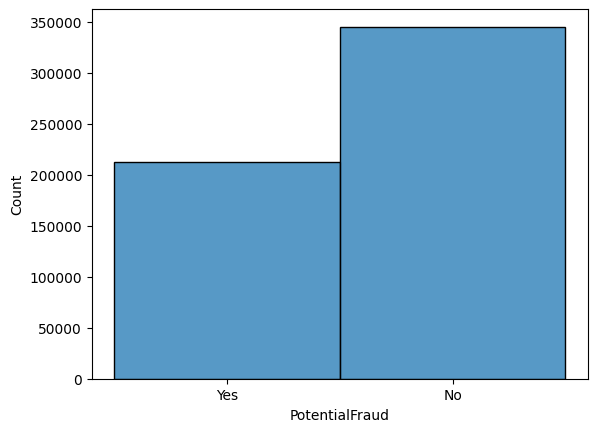

In [ ]:
#Target Value (PotentialFraud)
basic_column_analysis(claims_providers,"PotentialFraud")

In [ ]:
#prueba de desbalance
proporcion = claims_providers["PotentialFraud"].value_counts()
mayor, menor = proporcion[0],proporcion[1]
print(proporcion, f"\nEl radio entre clases es: {mayor/menor} por lo tanto hay un desbalance de clases")

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64 
El radio entre clases es: 1.6232213011522774 por lo tanto hay un desbalance de clases


In [ ]:
# Droping columns with more than the 60% of nans or preprocessed data or because it doesnt make sense
for col in claims_providers.columns:
  print(f"{col}: {round(claims_providers[col].isnull().sum()/claims_providers.shape[0],3)}%")

BeneID: 0.0%
ClaimID: 0.0%
ClaimStartDt: 0.0%
ClaimEndDt: 0.0%
Provider: 0.0%
InscClaimAmtReimbursed: 0.0%
AttendingPhysician: 0.003%
OperatingPhysician: 0.795%
OtherPhysician: 0.642%
AdmissionDt: 0.927%
ClmAdmitDiagnosisCode: 0.739%
DeductibleAmtPaid: 0.002%
DischargeDt: 0.927%
DiagnosisGroupCode: 0.927%
ClmDiagnosisCode_1: 0.019%
ClmDiagnosisCode_2: 0.35%
ClmDiagnosisCode_3: 0.565%
ClmDiagnosisCode_4: 0.705%
ClmDiagnosisCode_5: 0.799%
ClmDiagnosisCode_6: 0.849%
ClmDiagnosisCode_7: 0.881%
ClmDiagnosisCode_8: 0.904%
ClmDiagnosisCode_9: 0.925%
ClmDiagnosisCode_10: 0.991%
ClmProcedureCode_1: 0.958%
ClmProcedureCode_2: 0.99%
ClmProcedureCode_3: 0.998%
ClmProcedureCode_4: 1.0%
ClmProcedureCode_5: 1.0%
ClmProcedureCode_6: 1.0%
Type: 0.0%
PotentialFraud: 0.0%
DOB: 0.0%
DOD: 0.993%
Gender: 0.0%
Race: 0.0%
RenalDiseaseIndicator: 0.0%
State: 0.0%
County: 0.0%
NoOfMonths_PartACov: 0.0%
NoOfMonths_PartBCov: 0.0%
ChronicCond_Alzheimer: 0.0%
ChronicCond_Heartfailure: 0.0%
ChronicCond_KidneyDisease:

## Handling missing values  and Feature Engineered:

Physician related = 0 means no physician helped

DiagnosisCode related = 0 means doesnt apply

numerical values = imputate mode (DeductibleAmtPaid) which in this case is 0

**Other cleansing tasks:**

- change 2 to 0 on categorical values,
- drop DOB
- change gender and race to one hot encoding

In [ ]:
# Adding derivative data plus feature engineer
claims_providers[['DOB','ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DOD']] = claims_providers[['DOB','ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DOD']].apply(pd.to_datetime)


In [ ]:
#Is alive
claims_providers['Alive'] = claims_providers['DOD'].apply(lambda val: 'No' if val != val else 'Yes')
#Duration of a claim
claims_providers["ClaimDuration"] = (claims_providers['ClaimEndDt'] - claims_providers['ClaimStartDt']).dt.days
#Age in years of beneficiary
claims_providers['Age'] = round(((claims_providers['ClaimStartDt'] - claims_providers['DOB']).dt.days)/365.25,0)

In [ ]:
#Physician Representation
# Gives us a code whether the following cases
# 0 is the same physician everytime
# 1 same for atten an operation
# 2 same for operation and other
# 3 they are unequal
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3

phy_same=claims_providers.apply(physician_same,axis=1)

claims_providers["phy_same"]=phy_same

#Count the number of different physicians a registry has
def physician_count(row,list_count):
    count=0
    for col in list_count:
        if pd.isnull(row[col]):
            continue
        else:
            count+=1
    return count

list_count=["AttendingPhysician","OperatingPhysician","OtherPhysician"]
phy_count=claims_providers.apply(physician_count,axis=1,args=(list_count,))

claims_providers["phy_count"]=phy_count

In [ ]:
claims_providers = claims_providers.fillna(0)

In [ ]:
#data prep
#change 2 to 0 on categorical values
claims_providers["PotentialFraud"]= claims_providers["PotentialFraud"].replace({"Yes":1,"No":0})
claims_providers["RenalDiseaseIndicator"]= claims_providers["RenalDiseaseIndicator"].replace({"Y":1})
cronic_cols_names=claims_providers.columns[claims_providers.columns.str.startswith("ChronicCond")]
cronic_cols=claims_providers[cronic_cols_names]
cronic=cronic_cols.replace({2:0})
claims_providers[cronic_cols_names]=cronic

In [ ]:
#generate binary values using get_dummies
gender_dummies = pd.get_dummies(claims_providers['Gender'], prefix="Gender")
race_dummies = pd.get_dummies(claims_providers['Race'], prefix="Race")
alive_dummies = pd.get_dummies(claims_providers['Alive'], prefix="Alive")
encoding = pd.concat([gender_dummies, race_dummies, alive_dummies], axis=1)
claims_providers = pd.concat([claims_providers, encoding], axis=1)

In [ ]:
#total of claims by provider
claims_providers['TotalProviderAdmitCodes'] = claims_providers.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

#total of group claims by provider
claims_providers['TotalProviderGroupAdmitCodes'] = claims_providers.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

#year of birth
claims_providers['DOB_Year'] = claims_providers['DOB'].dt.year
#DOB given by provider
claims_providers['DobGivenProvider'] = claims_providers.groupby(['Provider'])['DOB_Year'].transform('nunique')
claims_providers.drop(['DOB_Year'], axis=1, inplace=True)
# Total claims for attending physicians
claims_providers['Att_Phy_tot_claims'] = claims_providers.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
#total claims for operating physician
claims_providers['Opr_Phy_tot_claims'] = claims_providers.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
#total claims for other physician
claims_providers['Oth_Phy_tot_claims'] = claims_providers.groupby(['OtherPhysician'])['ClaimID'].transform('count')
#Total claims submitted by all physicians
claims_providers['TotalClaimsPhys'] = claims_providers['Att_Phy_tot_claims'] + claims_providers['Opr_Phy_tot_claims'] + claims_providers['Oth_Phy_tot_claims']
# Sum of beneficiary age treated by providers
claims_providers['BeneAgeSum'] = claims_providers.groupby(['Provider'])['Age'].transform('sum')

In [ ]:
#Grouping values by (Benef, 3 physicians)
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE",data=claims_providers)
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY",data=claims_providers)
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY",data=claims_providers)
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY",data=claims_providers)
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code",data=claims_providers)
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode",data=claims_providers)

In [ ]:
# Dropping the columns as there 99% of values are same where they had 80% + of nan values
"""
ClmDiagnosisCode_6: 0.849%
ClmDiagnosisCode_7: 0.881%
ClmDiagnosisCode_8: 0.904%
ClmDiagnosisCode_9: 0.925%
ClmDiagnosisCode_10: 0.991%
ClmProcedureCode_1: 0.958%
ClmProcedureCode_2: 0.99%
ClmProcedureCode_3: 0.998%
ClmProcedureCode_4: 1.0%
ClmProcedureCode_5: 1.0%
ClmProcedureCode_6: 1.0%
"""

claims_providers.drop(['ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace=True)

In [ ]:
# Diagnosis Codes columns
create_agg_feats(grp_col='ClmDiagnosisCode_1', feat_name="Claim_DiagCode1",data=claims_providers)
create_agg_feats(grp_col='ClmDiagnosisCode_2', feat_name="Claim_DiagCode2",data=claims_providers)
create_agg_feats(grp_col='ClmDiagnosisCode_3', feat_name="Claim_DiagCode3",data=claims_providers)
create_agg_feats(grp_col='ClmDiagnosisCode_4', feat_name="Claim_DiagCode4",data=claims_providers)
create_agg_feats(grp_col='ClmDiagnosisCode_5', feat_name="Claim_DiagCode5",data=claims_providers)

<ipython-input-7-6d8b555918f4>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[feat_5] = data.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)
<ipython-input-7-6d8b555918f4>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[feat_6] = data.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)
<ipython-input-7-6d8b555918f4>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [ ]:
claims_providers.shape

(558211, 143)

In [ ]:
claims_providers.columns[:60]

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'Type', 'PotentialFraud',
       'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'O

In [ ]:
pd.DataFrame(claims_providers.isna().sum())

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
...,...
Claim_DiagCode5_IP_Annual_ReImb_Amt,0
Claim_DiagCode5_IP_Annual_Ded_Amt,0
Claim_DiagCode5_OP_Annual_ReImb_Amt,0
Claim_DiagCode5_OP_Annual_Ded_Amt,0


In [ ]:
# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'DOB', 'DOD', 'Gender', 'Race']

claims_providers.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [ ]:
claims_providers.shape

(558211, 123)

In [ ]:
claims_providers.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Type,PotentialFraud,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,Claim_DiagCode4_OP_Annual_ReImb_Amt,Claim_DiagCode4_OP_Annual_Ded_Amt,Claim_DiagCode4_Claim_Duration,Claim_DiagCode5_Insc_ReImb_Amt,Claim_DiagCode5_CoPayment,Claim_DiagCode5_IP_Annual_ReImb_Amt,Claim_DiagCode5_IP_Annual_Ded_Amt,Claim_DiagCode5_OP_Annual_ReImb_Amt,Claim_DiagCode5_OP_Annual_Ded_Amt,Claim_DiagCode5_Claim_Duration
0,PRV55912,26000,1068.0,0,1,0,39,230,12,12,...,163230,49900,451,2620030,319712.0,5518360,641676,904640,248460,1760
1,PRV55907,5000,1068.0,0,0,0,39,230,12,12,...,837121810,240681396,473911,140168590,4254400.0,1884246760,206986276,996849220,285007298,595446
2,PRV56046,5000,1068.0,0,0,0,39,230,12,12,...,613780,170710,846,376660,58740.0,951610,119208,182190,60080,334
3,PRV55912,19000,1068.0,0,1,0,39,230,12,12,...,1612350,454900,2768,39100,1068.0,170900,13884,176020,43400,184
4,PRV55950,100,0.0,1,0,0,39,230,12,12,...,837121810,240681396,473911,140168590,4254400.0,1884246760,206986276,996849220,285007298,595446


In [ ]:
#Grouping by features of interest
model_data = claims_providers.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
model_data.shape

<ipython-input-37-c723d78d5ad2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model_data = claims_providers.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
<ipython-input-37-c723d78d5ad2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  model_data = claims_providers.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
<ipython-input-37-c723d78d5ad2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

(5410, 121)

In [ ]:
model_data.columns

Index(['Provider', 'PotentialFraud', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Type', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       ...
       'Claim_DiagCode4_OP_Annual_ReImb_Amt',
       'Claim_DiagCode4_OP_Annual_Ded_Amt', 'Claim_DiagCode4_Claim_Duration',
       'Claim_DiagCode5_Insc_ReImb_Amt', 'Claim_DiagCode5_CoPayment',
       'Claim_DiagCode5_IP_Annual_ReImb_Amt',
       'Claim_DiagCode5_IP_Annual_Ded_Amt',
       'Claim_DiagCode5_OP_Annual_ReImb_Amt',
       'Claim_DiagCode5_OP_Annual_Ded_Amt', 'Claim_DiagCode5_Claim_Duration'],
      dtype='object', length=121)

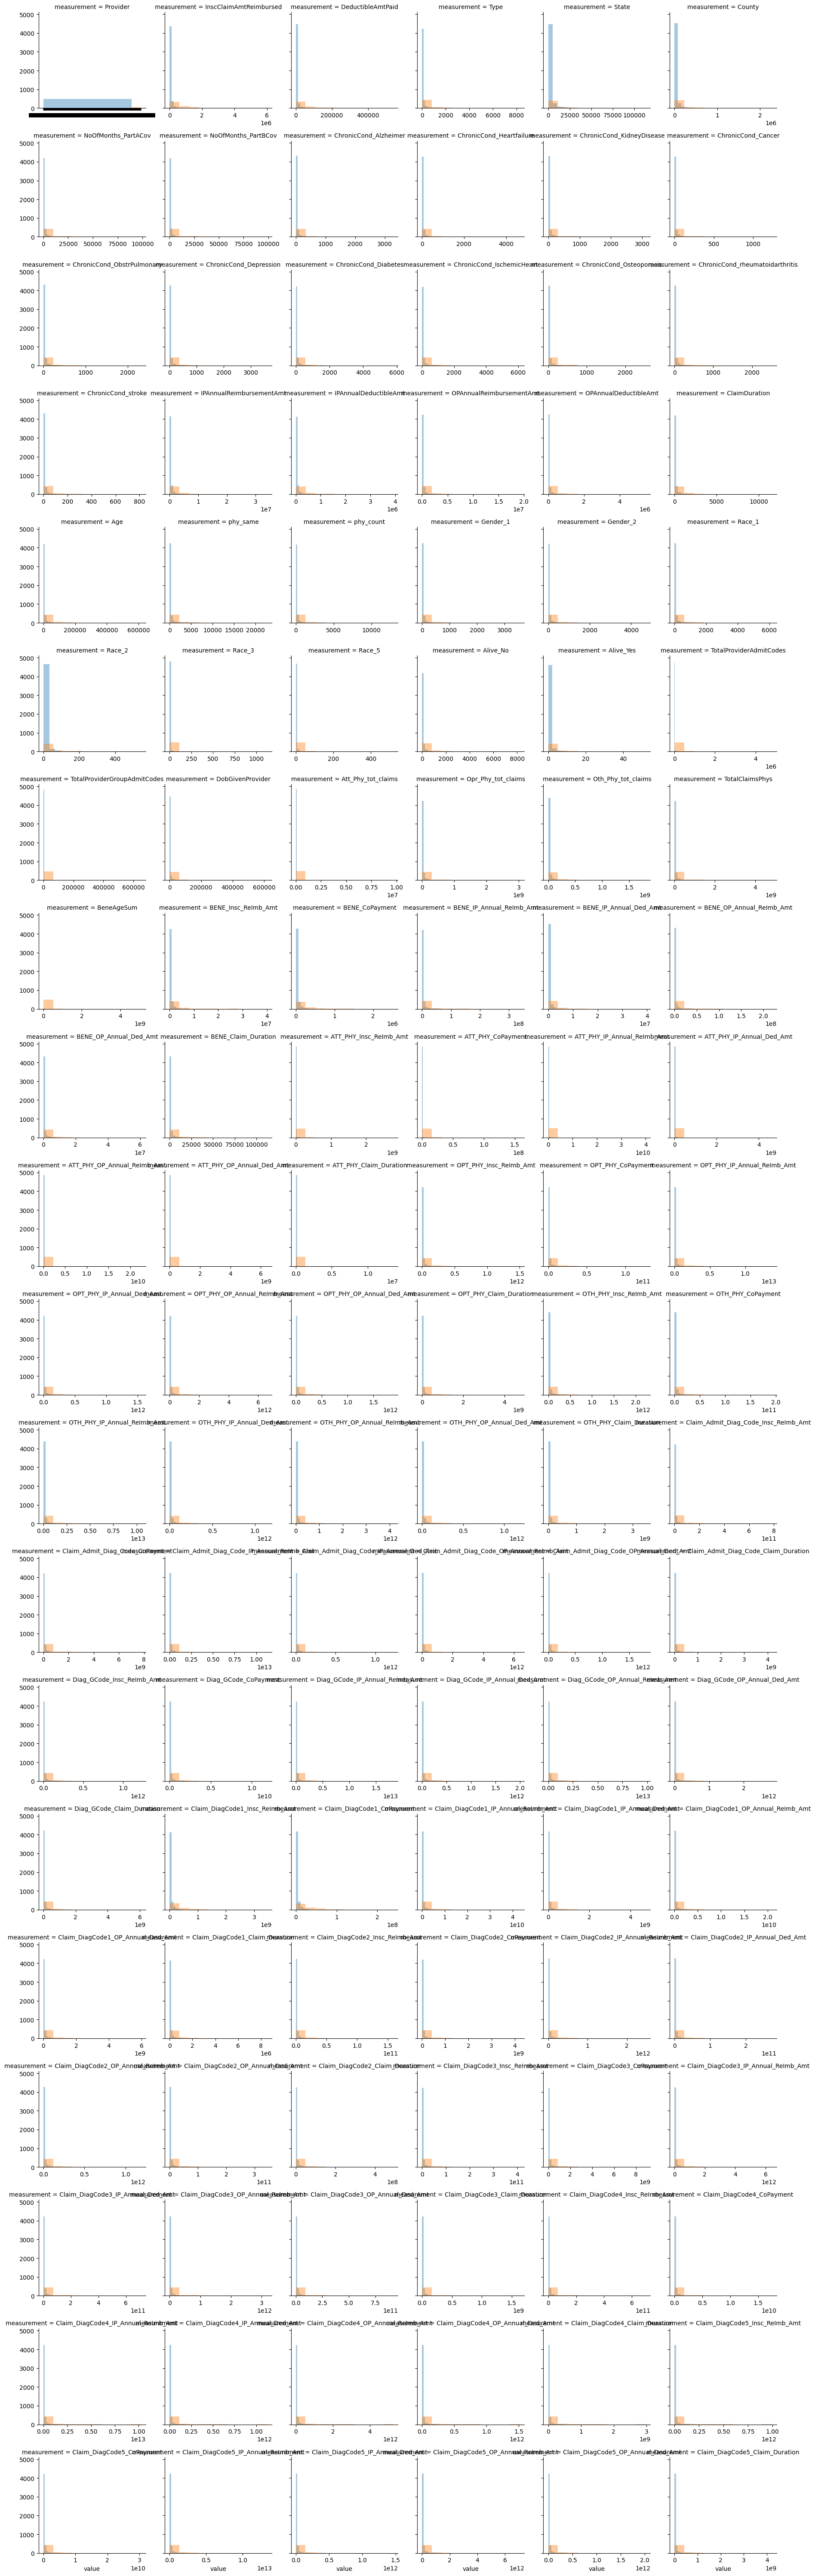

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

model_vis = pd.melt(model_data, "PotentialFraud", var_name="measurement")
g = sns.FacetGrid(model_vis, hue="PotentialFraud", col="measurement", col_wrap=6, sharex=False)
g.map(plt.hist, "value", alpha=.4)

In [ ]:
#Dividing data for the model
X = model_data.drop(axis=1, columns=['Provider','PotentialFraud'])
y = model_data['PotentialFraud']
X.shape, y.shape

((5410, 119), (5410,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=39)

In [ ]:
from sklearn.preprocessing import RobustScaler
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

In [ ]:
from collections import Counter
counter = Counter(y_train)
counter

Counter({0: 3678, 1: 379})

In [ ]:
#DATA AUGMENTATION WITH OVERSAMPLING
from imblearn.over_sampling import ADASYN
oversample = ADASYN(sampling_strategy=0.35, n_neighbors=12)

X_train_ovsamp, y_train_ovsamp = oversample.fit_resample(X_train_std, y_train)

X_train_ovsamp.shape, y_train_ovsamp.shape

((4930, 119), (4930,))

In [ ]:
counter = Counter(y_train_ovsamp)
counter

Counter({0: 3678, 1: 1252})

In [ ]:
#PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(0.95)
pca.fit(X_train_ovsamp)
print(pca.n_components_)
X_train_OS_std_pca = pca.transform(X_train_ovsamp)
X_test_std_pca = pca.transform(X_test_std)

2


In [ ]:
X_train_OS_std_pca.shape

(4930, 2)

In [ ]:
X_test_std_pca.shape

(1353, 2)

In [ ]:
y_train_ovsamp.shape

(4930,)

In [ ]:
y_test.shape

(1353,)

## Applying Models

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

#models
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
#logs beautifier and configs
from IPython.display import display, Markdown, Latex, clear_output
from tqdm import tqdm #tqdm means "progress" in Arabic (taqadum, تقدّم) and is an abbreviation for "I love you so much" in Spanish (te quiero demasiado) :0
from warnings import filterwarnings
import ipywidgets as widgets
import io

In [ ]:
def pred_prob(clf, data):
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='green')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)")
      plt.ylabel("True Positive Rate(TPR)")
      plt.title("Area Under Curve")
      plt.grid(color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()

def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='BuPu')
        ax[0].set_title('Train Confusion Matrix')
        ax[0].set_xlabel("Predicted Label")
        ax[0].set_ylabel("Real Label")

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='Greens')
        ax[1].set_title('Test Confusion Matrix')
        ax[1].set_xlabel("Predicted Label")
        ax[1].set_ylabel("Real Label")

    plt.show()

    return train_prediction, test_prediction

In [ ]:
def evaluate_model(clf, x_train, x_test, y_train, y_test):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)

    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)

    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)


    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)

    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)

    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)

    # Precision
    train_precision_score = precision_score(y_train, train_prediction)
    test_precision_score = precision_score(y_test, test_prediction)
    # Recall
    print("\n")
    print("### Train AUC = {}".format(train_auc))
    print("### Test AUC = {}".format(test_auc))
    print("### Model train accuracy is : {:.4f}".format(accuracy_score(y_train, train_prediction)))
    print("### Model test accuracy is : {:.4f}".format(accuracy_score(y_test, test_prediction)))
    print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
    print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))
    print("### Model Train precision Score is : {:.4f}".format(train_precision_score))
    print("### Model Test precision Score is : {:.4f}".format(test_precision_score))

### Con PCA

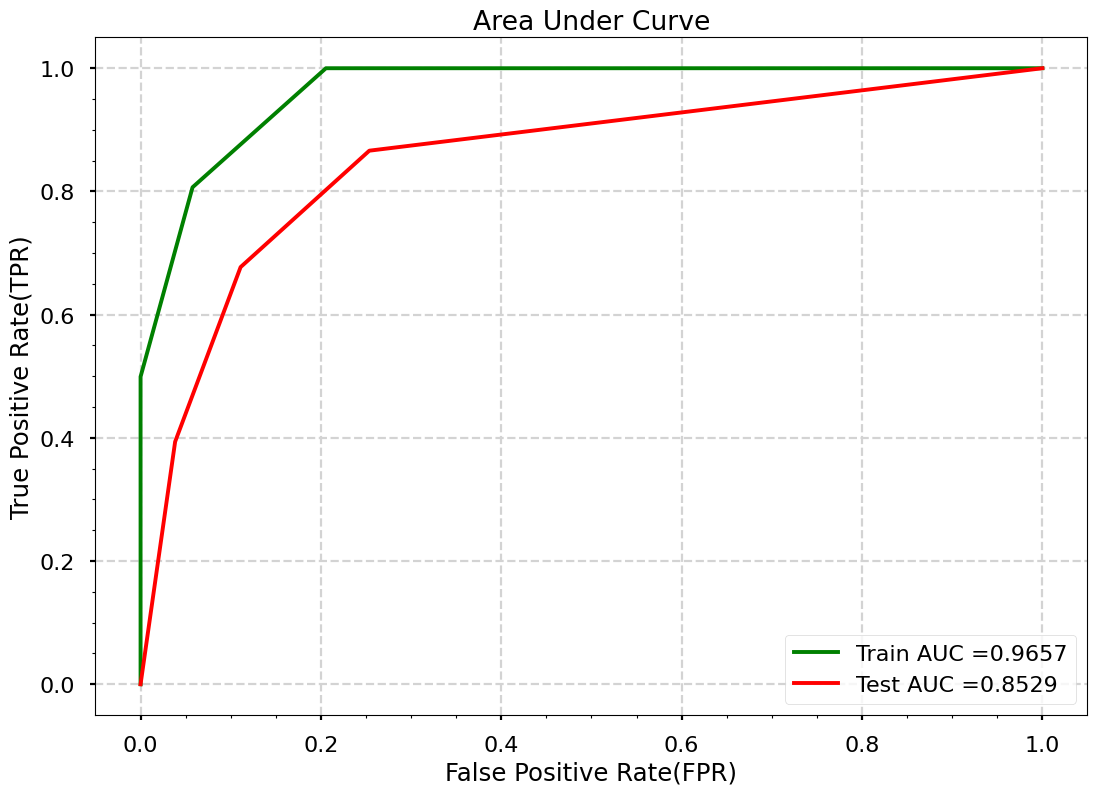

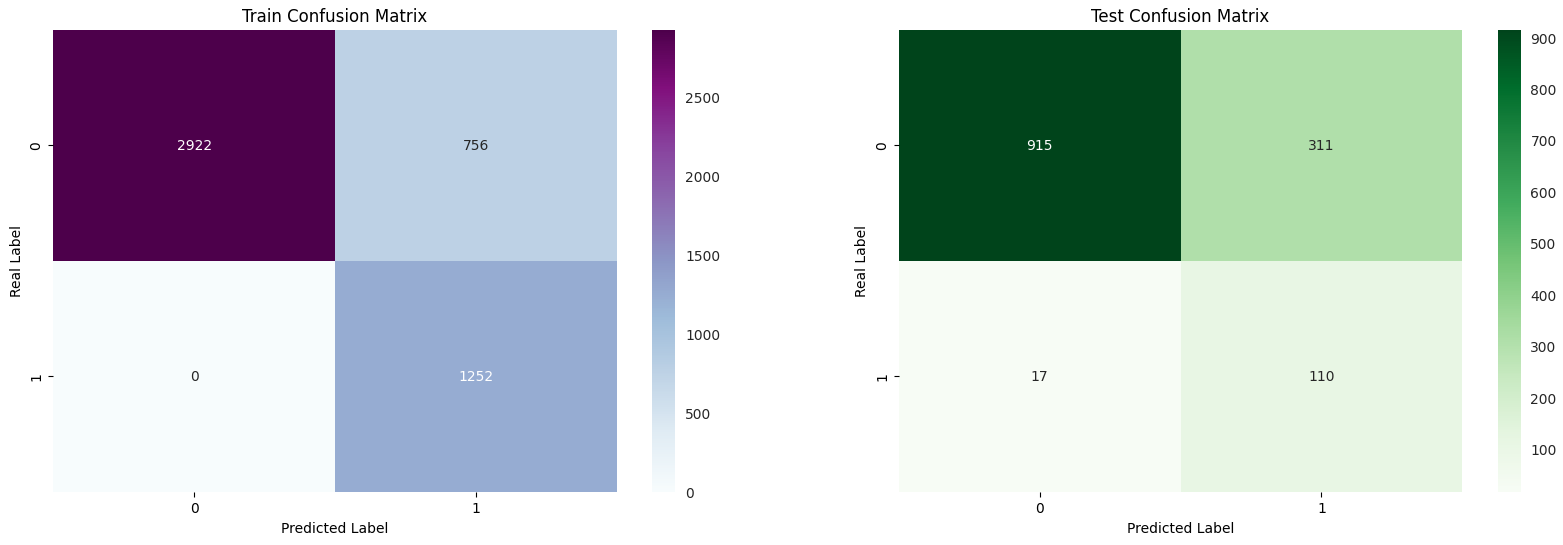



### Train AUC = 0.9657018590809354
### Test AUC = 0.852940231981606
### Model train accuracy is : 0.8467
### Model test accuracy is : 0.7576
### Model Train F1 Score is : 0.7681
### Model Test F1 Score is : 0.4015
### Model Train precision Score is : 0.6235
### Model Test precision Score is : 0.2613


In [ ]:
#KNN (3)
from sklearn.neighbors import KNeighborsClassifier

model_knn1 = KNeighborsClassifier(n_neighbors=3)
model_knn1.fit(X_train_OS_std_pca,y_train_ovsamp)

evaluate_model(model_knn1, X_train_OS_std_pca, X_test_std_pca, y_train_ovsamp, y_test)

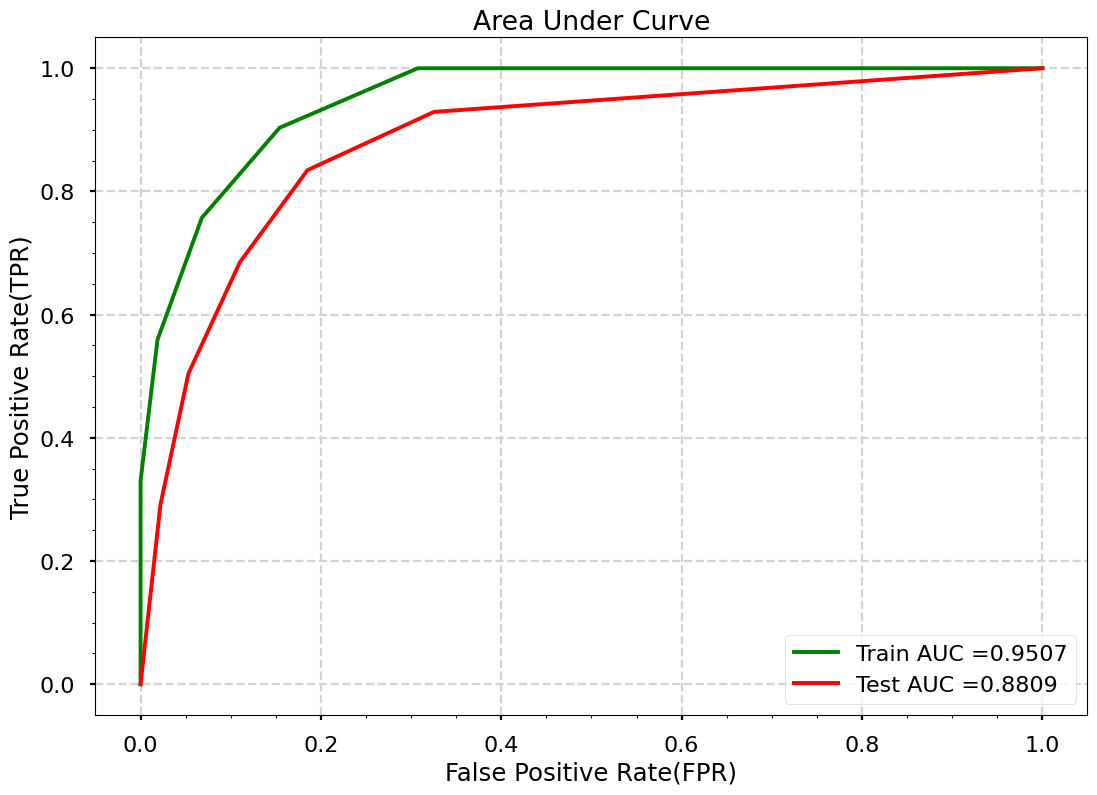

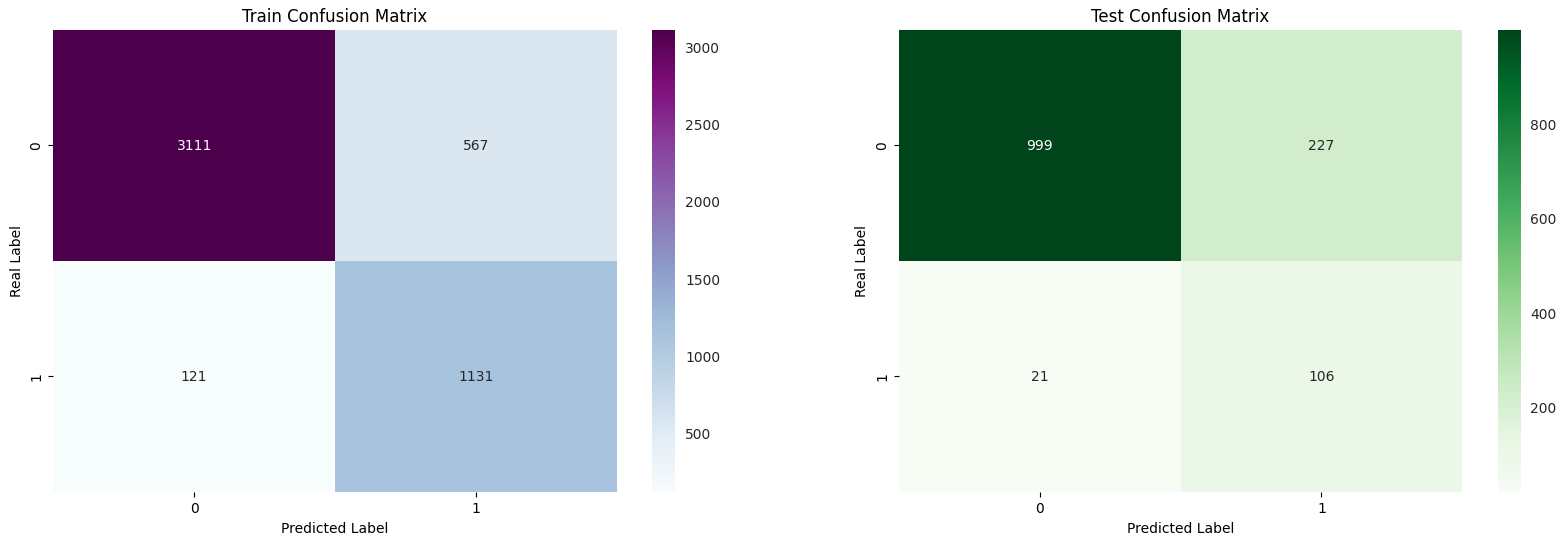



### Train AUC = 0.9507168085169222
### Test AUC = 0.8808685822918139
### Model train accuracy is : 0.8604
### Model test accuracy is : 0.8167
### Model Train F1 Score is : 0.7668
### Model Test F1 Score is : 0.4609
### Model Train precision Score is : 0.6661
### Model Test precision Score is : 0.3183


In [ ]:
#KNN (5)
from sklearn.neighbors import KNeighborsClassifier

model_knn2 = KNeighborsClassifier(n_neighbors=5)
model_knn2.fit(X_train_OS_std_pca,y_train_ovsamp)

evaluate_model(model_knn2, X_train_OS_std_pca, X_test_std_pca, y_train_ovsamp, y_test)

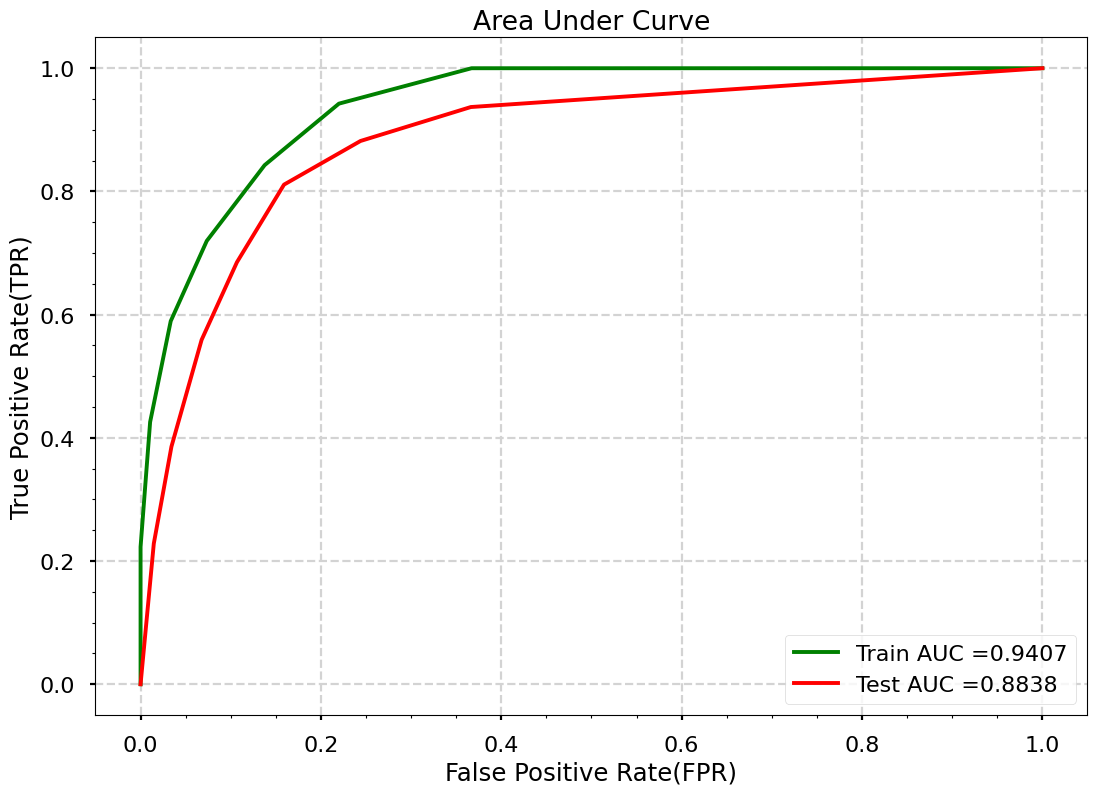

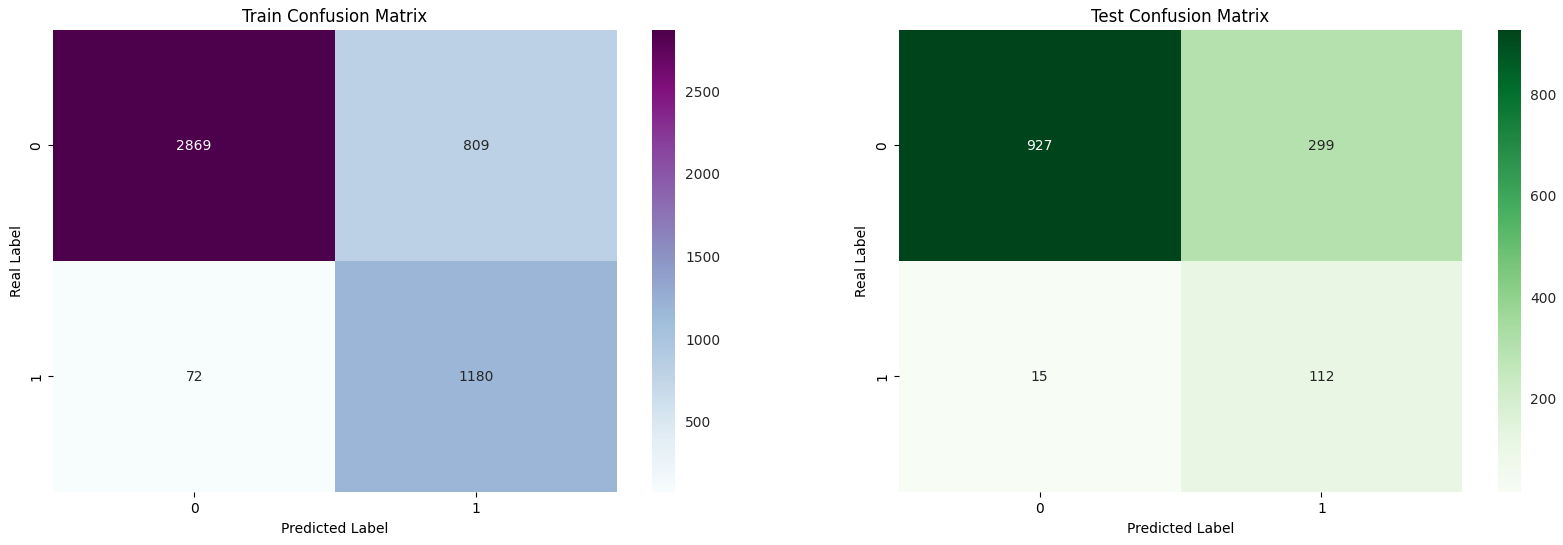



### Train AUC = 0.9406602508308621
### Test AUC = 0.8837715636279561
### Model train accuracy is : 0.8213
### Model test accuracy is : 0.7679
### Model Train F1 Score is : 0.7282
### Model Test F1 Score is : 0.4164
### Model Train precision Score is : 0.5933
### Model Test precision Score is : 0.2725


In [ ]:
#KNN (7)
from sklearn.neighbors import KNeighborsClassifier

model_knn3 = KNeighborsClassifier(n_neighbors=7)
model_knn3.fit(X_train_OS_std_pca,y_train_ovsamp)

evaluate_model(model_knn3, X_train_OS_std_pca, X_test_std_pca, y_train_ovsamp, y_test)

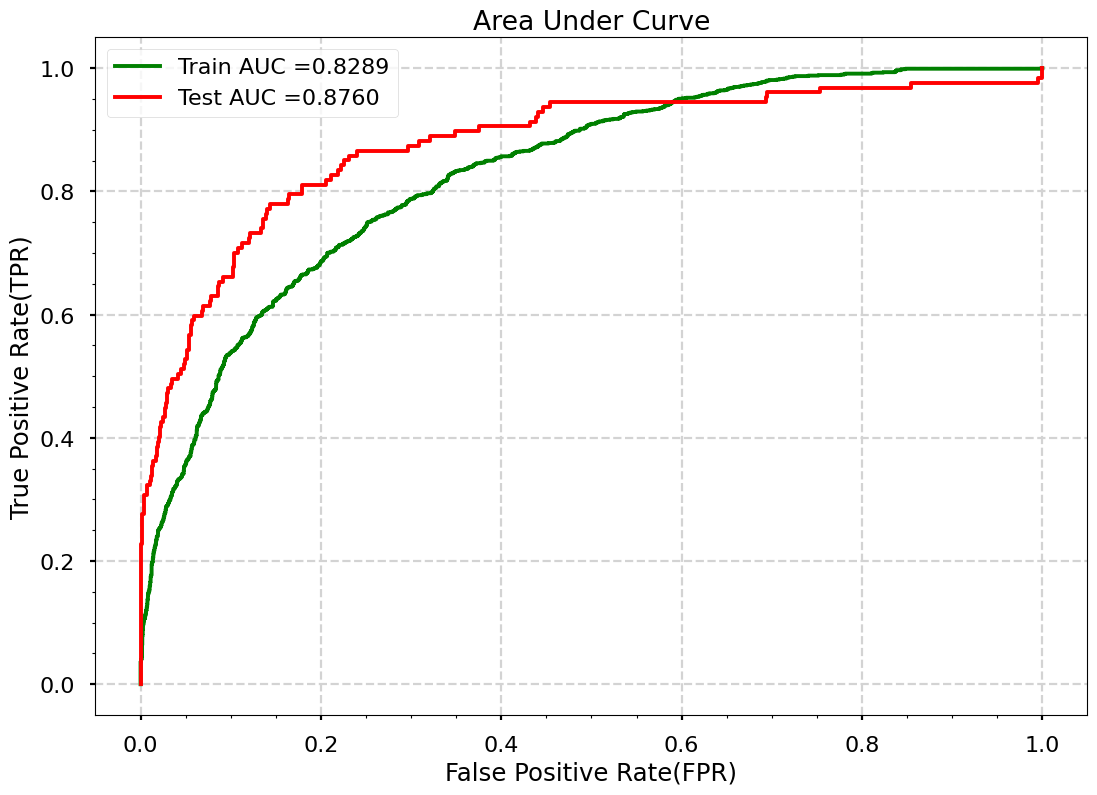

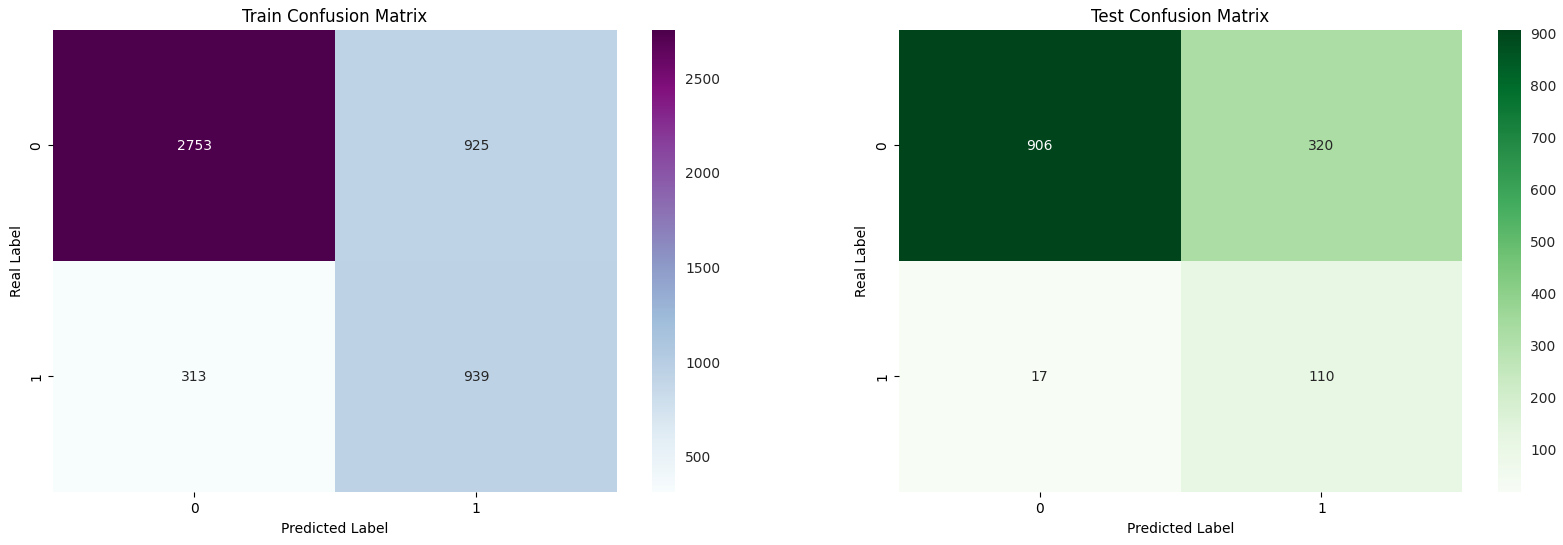



### Train AUC = 0.8289371046564757
### Test AUC = 0.8760131533313639
### Model train accuracy is : 0.7489
### Model test accuracy is : 0.7509
### Model Train F1 Score is : 0.6027
### Model Test F1 Score is : 0.3950
### Model Train precision Score is : 0.5038
### Model Test precision Score is : 0.2558


In [ ]:
#RegresionLogistica
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True,
                               solver='liblinear',
                               tol=0.0001,
                               max_iter=1000,
                               verbose=0,
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg.fit(X_train_OS_std_pca,y_train_ovsamp)

evaluate_model(log_reg, X_train_OS_std_pca, X_test_std_pca, y_train_ovsamp, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


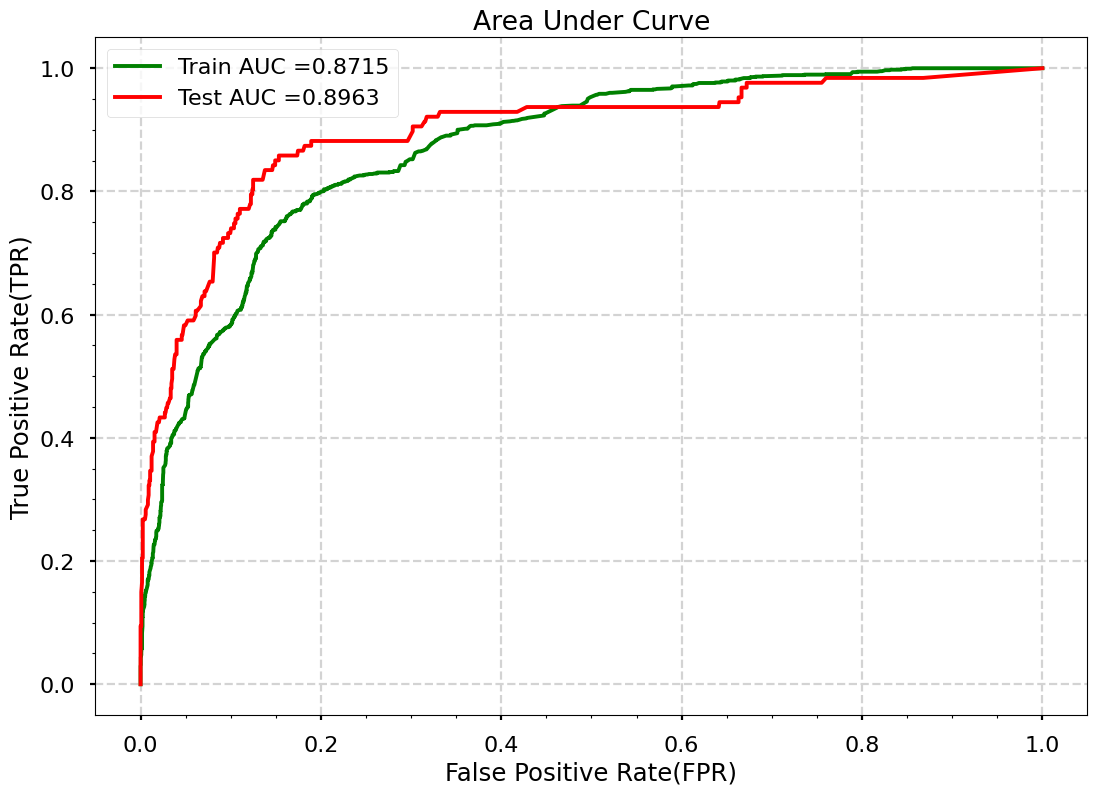

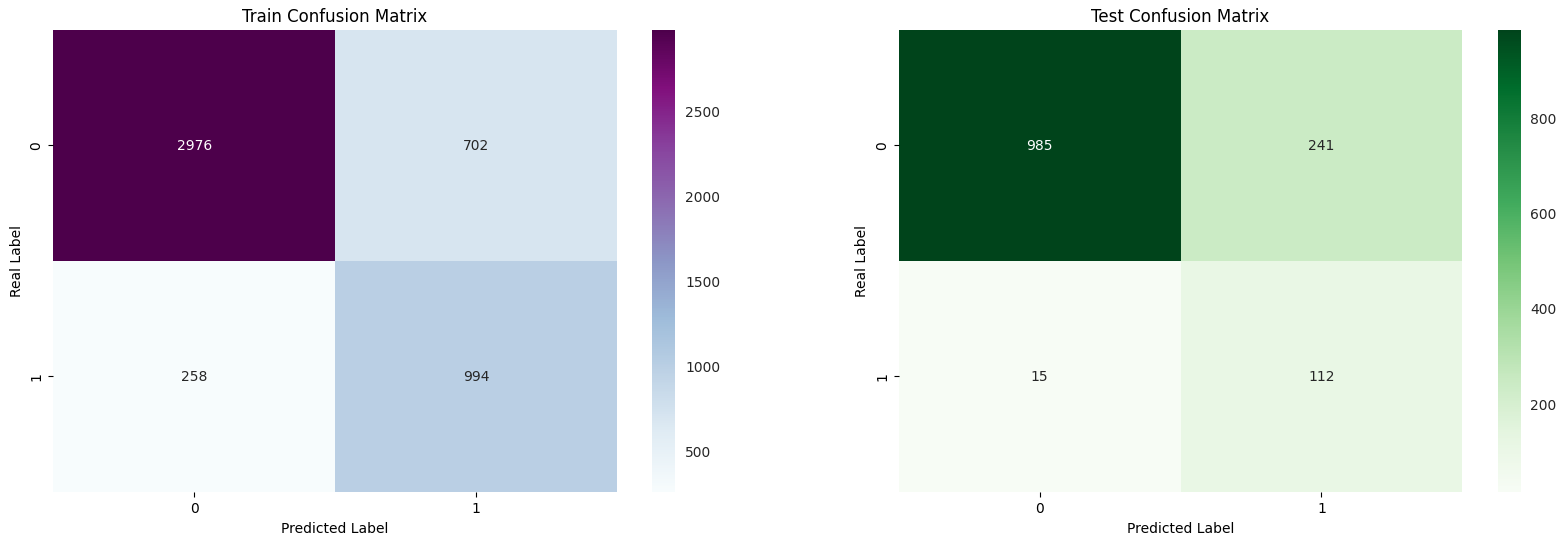



### Train AUC = 0.8714511376685828
### Test AUC = 0.8963115438465787
### Model train accuracy is : 0.8053
### Model test accuracy is : 0.8108
### Model Train F1 Score is : 0.6744
### Model Test F1 Score is : 0.4667
### Model Train precision Score is : 0.5861
### Model Test precision Score is : 0.3173


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

random_forest.fit(X_train_OS_std_pca, y_train_ovsamp)
evaluate_model(random_forest, X_train_OS_std_pca, X_test_std_pca, y_train_ovsamp, y_test)

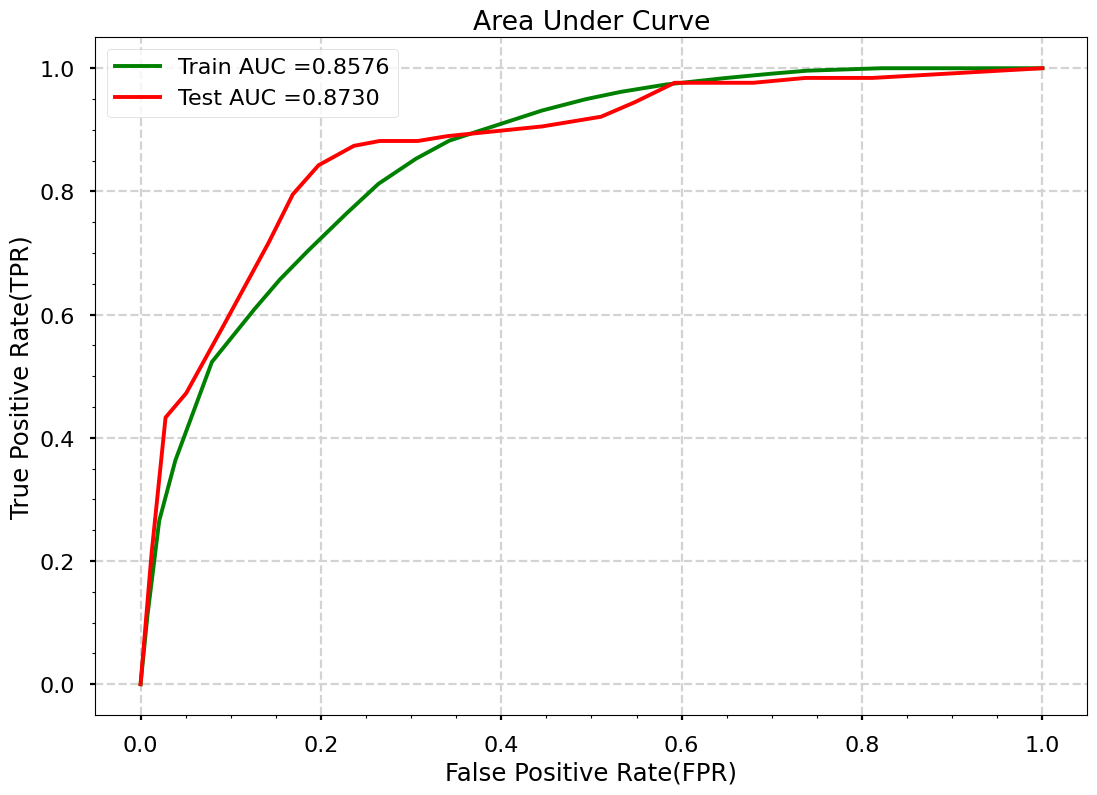

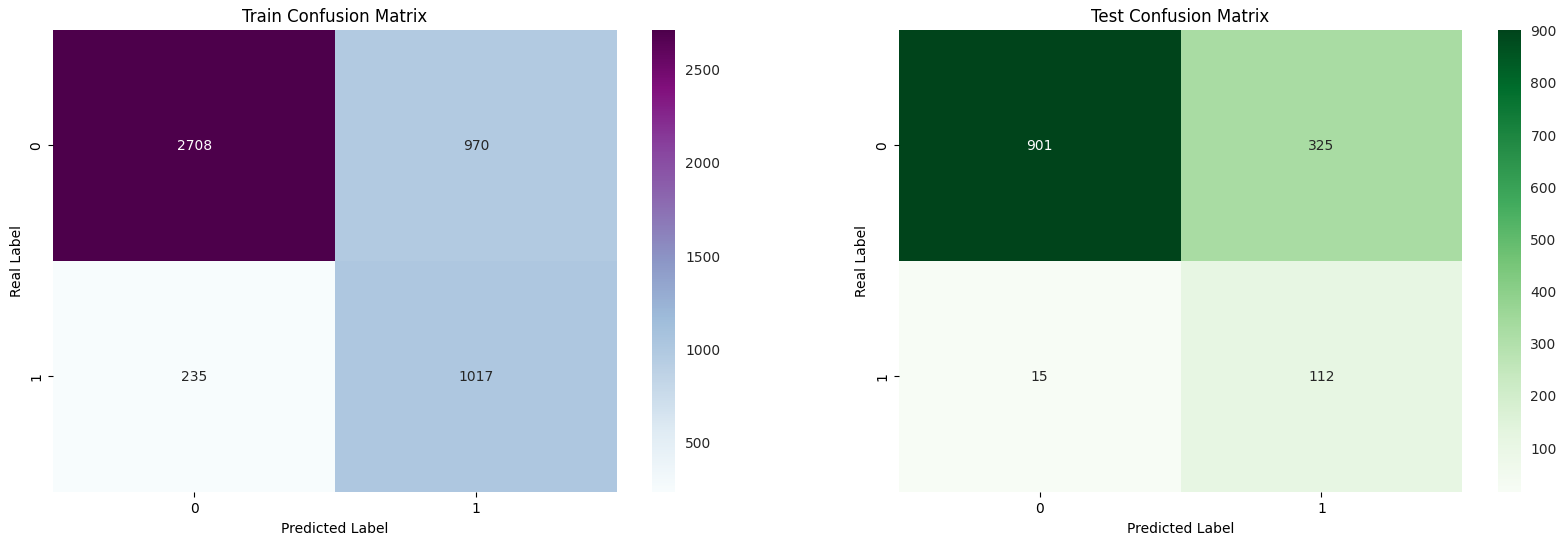



### Train AUC = 0.8576165031002054
### Test AUC = 0.8729560313933026
### Model train accuracy is : 0.7556
### Model test accuracy is : 0.7487
### Model Train F1 Score is : 0.6280
### Model Test F1 Score is : 0.3972
### Model Train precision Score is : 0.5118
### Model Test precision Score is : 0.2563


In [ ]:
from tensorflow.python.ops.gen_math_ops import truncate_mod_eager_fallback
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

tree.fit(X_train_OS_std_pca, y_train_ovsamp)

evaluate_model(tree, X_train_OS_std_pca, X_test_std_pca, y_train_ovsamp, y_test)

### Sin PCA

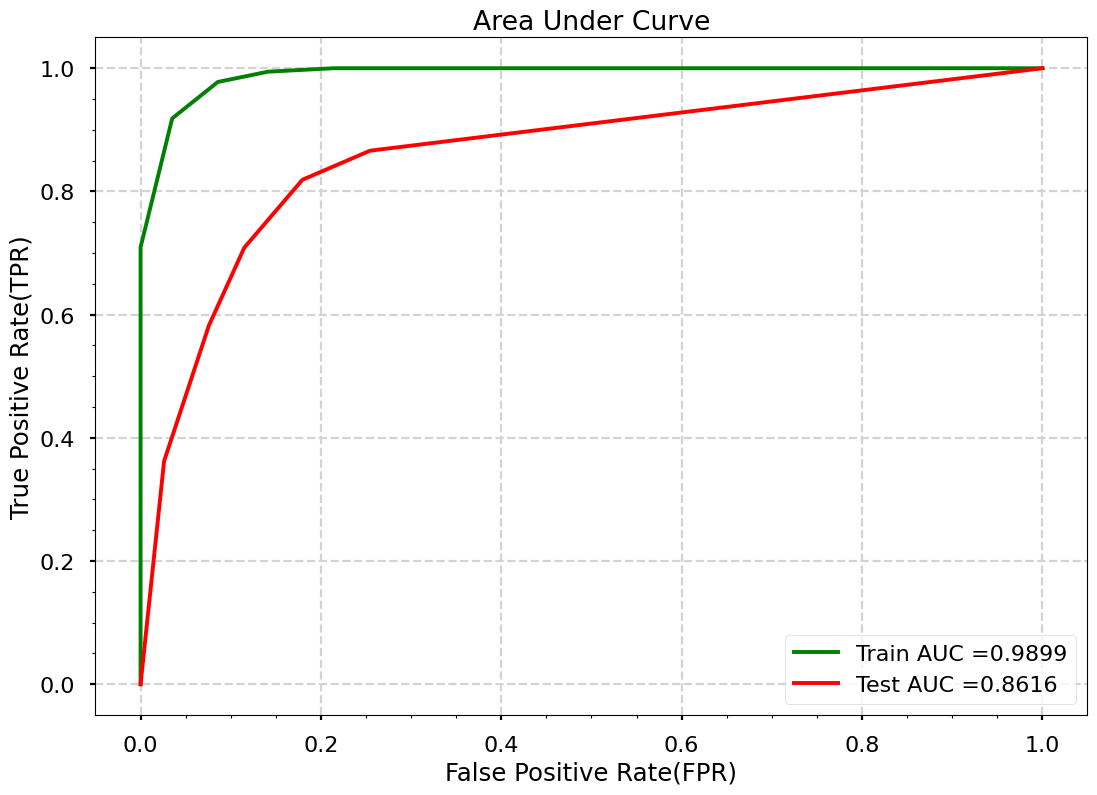

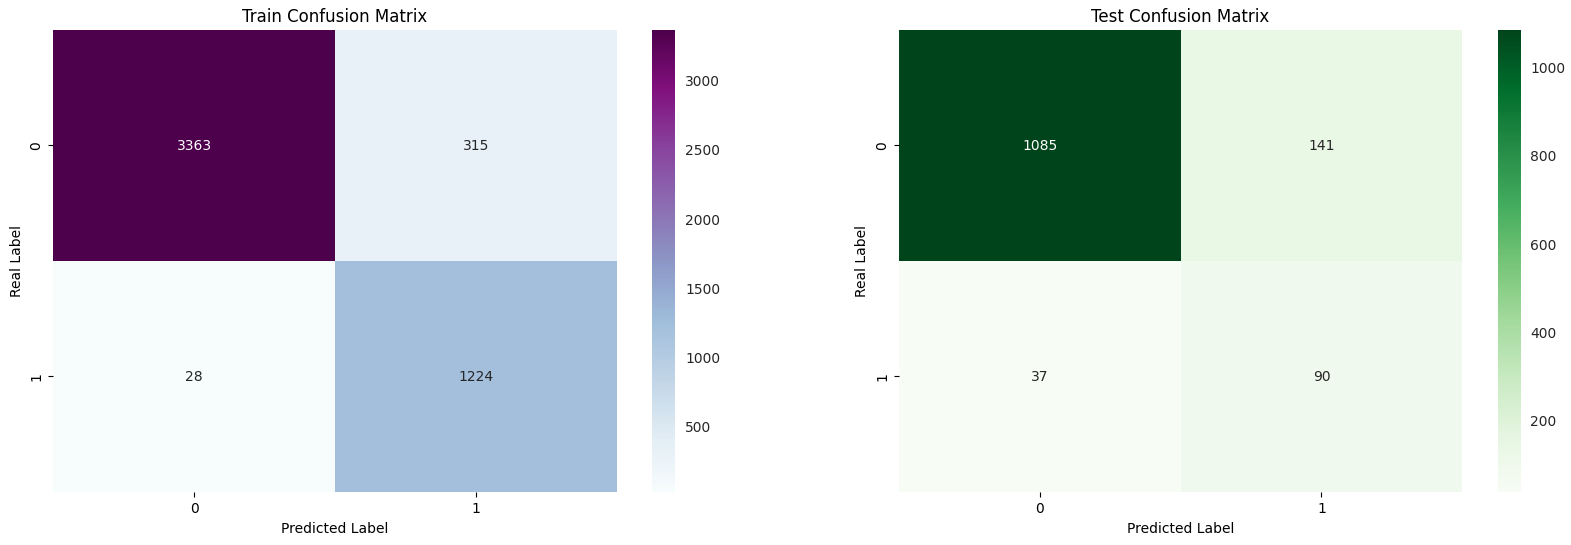



### Train AUC = 0.9898645039063111
### Test AUC = 0.8615688944265327
### Model train accuracy is : 0.9304
### Model test accuracy is : 0.8684
### Model Train F1 Score is : 0.8771
### Model Test F1 Score is : 0.5028
### Model Train precision Score is : 0.7953
### Model Test precision Score is : 0.3896


In [ ]:
#KNN (5)
from sklearn.neighbors import KNeighborsClassifier

model_knn2 = KNeighborsClassifier(n_neighbors=5)
model_knn2.fit(X_train_ovsamp,y_train_ovsamp)

evaluate_model(model_knn2, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

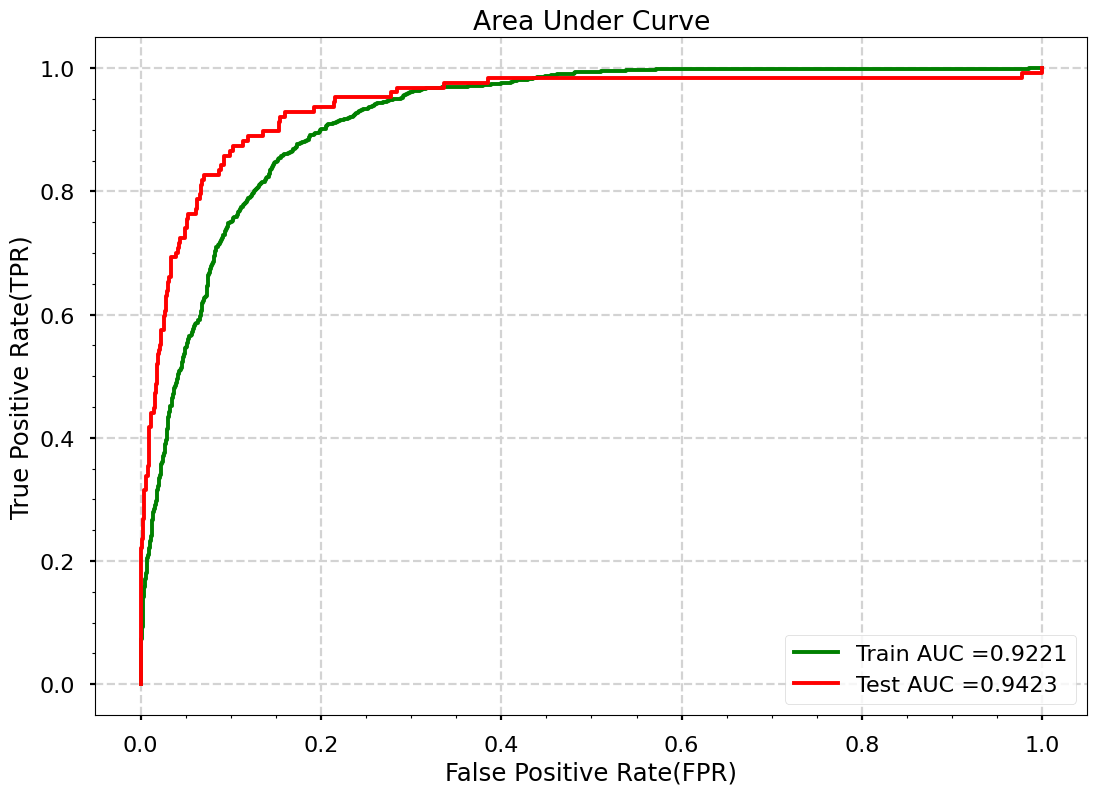

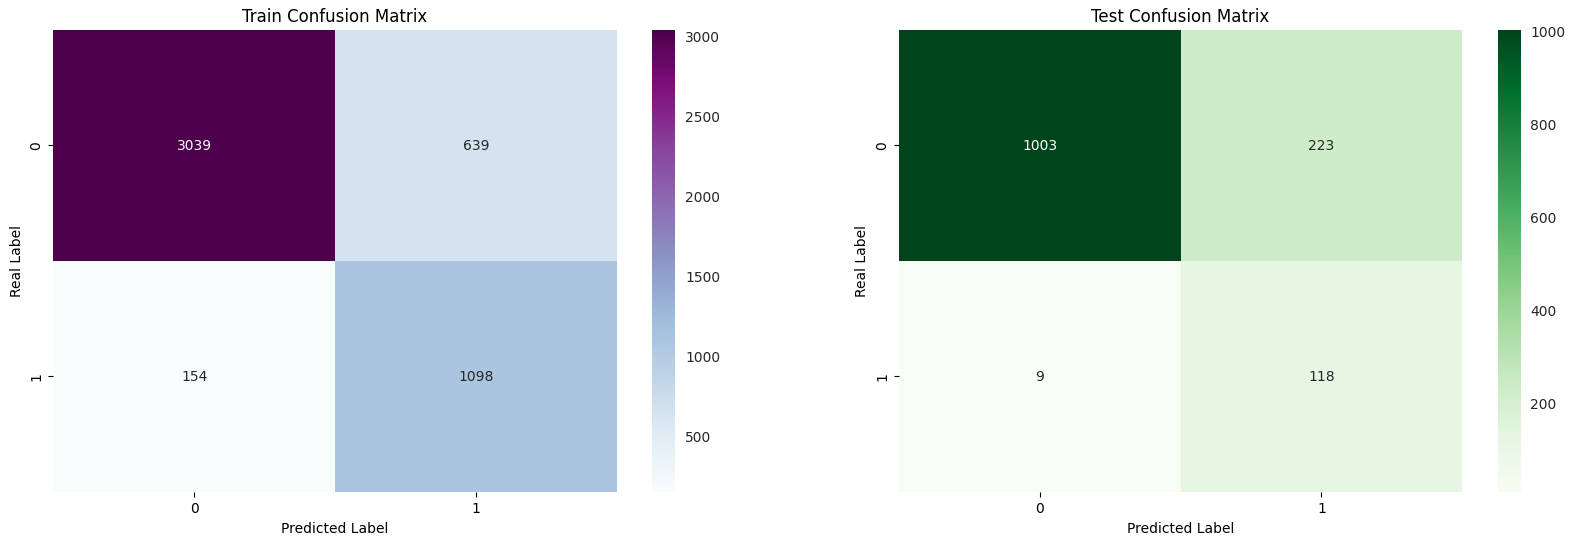



### Train AUC = 0.9220527199981933
### Test AUC = 0.9422679220562356
### Model train accuracy is : 0.8391
### Model test accuracy is : 0.8285
### Model Train F1 Score is : 0.7347
### Model Test F1 Score is : 0.5043
### Model Train precision Score is : 0.6321
### Model Test precision Score is : 0.3460


In [ ]:
#RegresionLogistica
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True,
                               solver='liblinear',
                               tol=0.0001,
                               max_iter=1000,
                               verbose=0,
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg.fit(X_train_ovsamp,y_train_ovsamp)

evaluate_model(log_reg, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


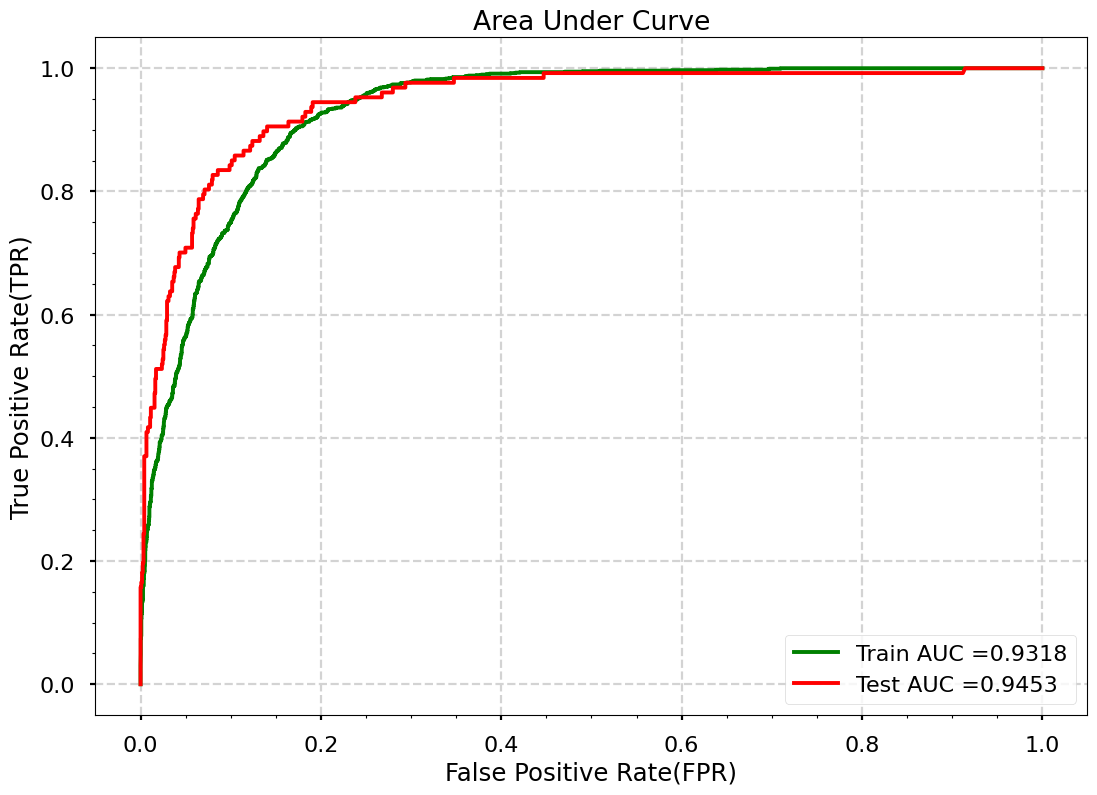

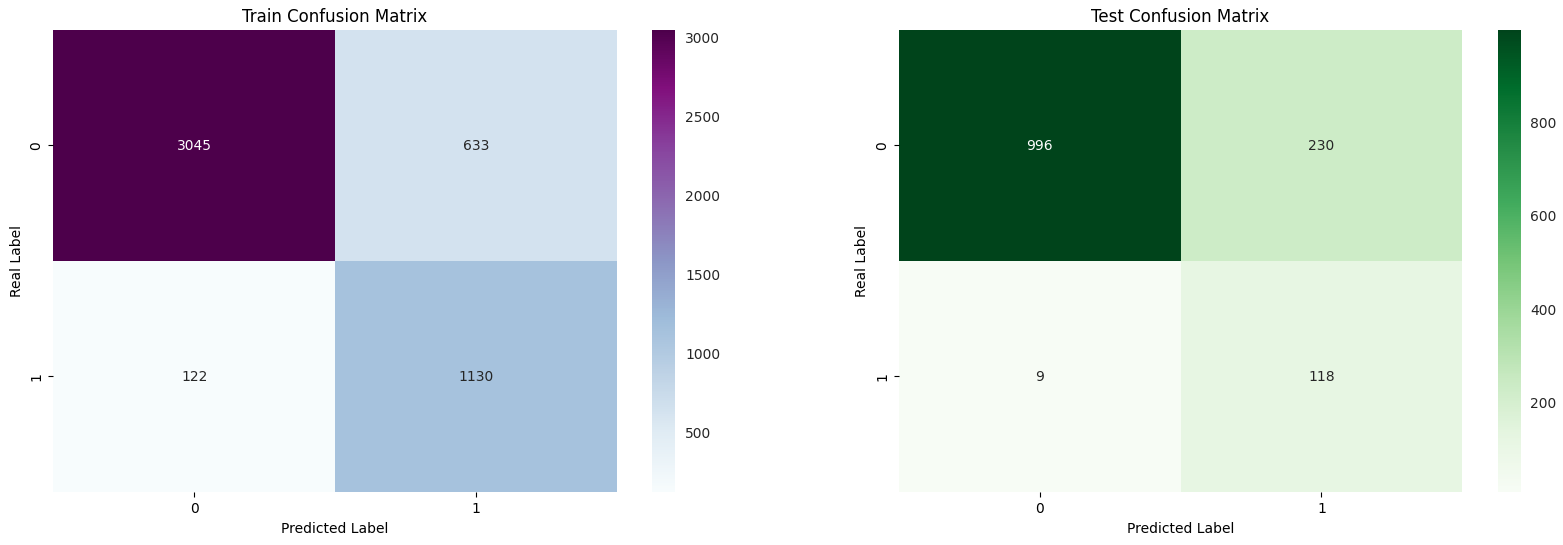



### Train AUC = 0.9318049250617175
### Test AUC = 0.9453411003069967
### Model train accuracy is : 0.8469
### Model test accuracy is : 0.8234
### Model Train F1 Score is : 0.7496
### Model Test F1 Score is : 0.4968
### Model Train precision Score is : 0.6410
### Model Test precision Score is : 0.3391


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

random_forest.fit(X_train_ovsamp, y_train_ovsamp)
evaluate_model(random_forest, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

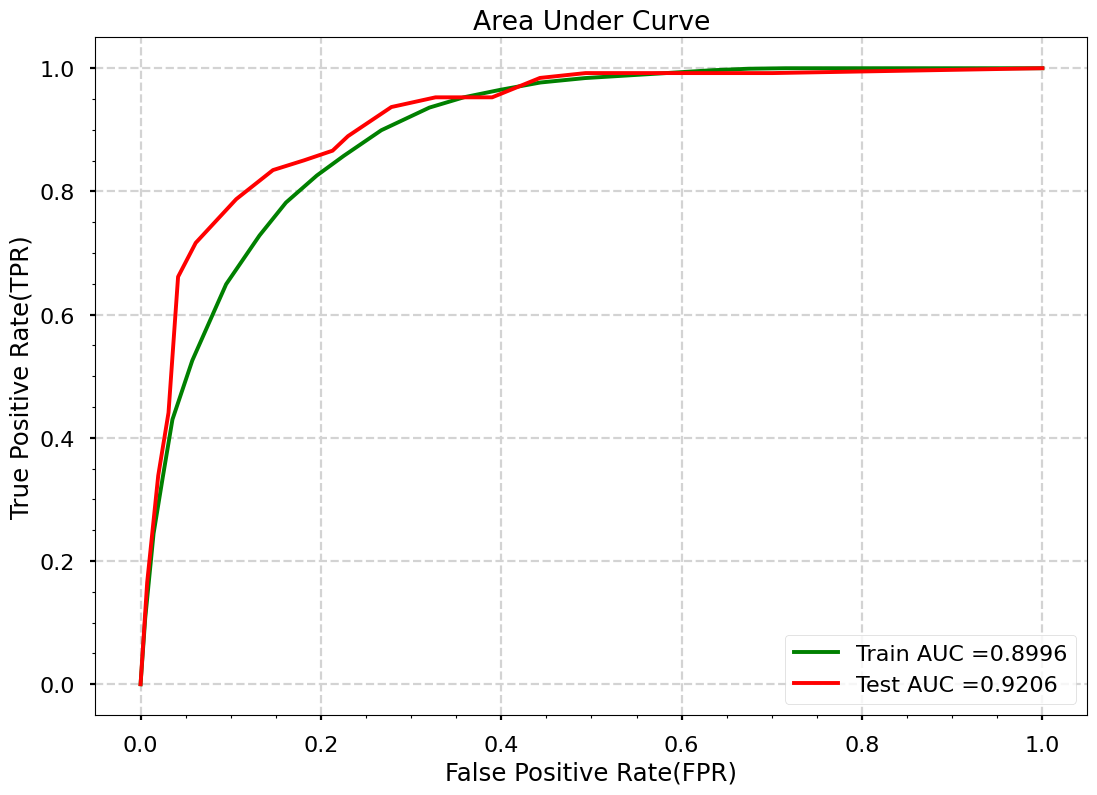

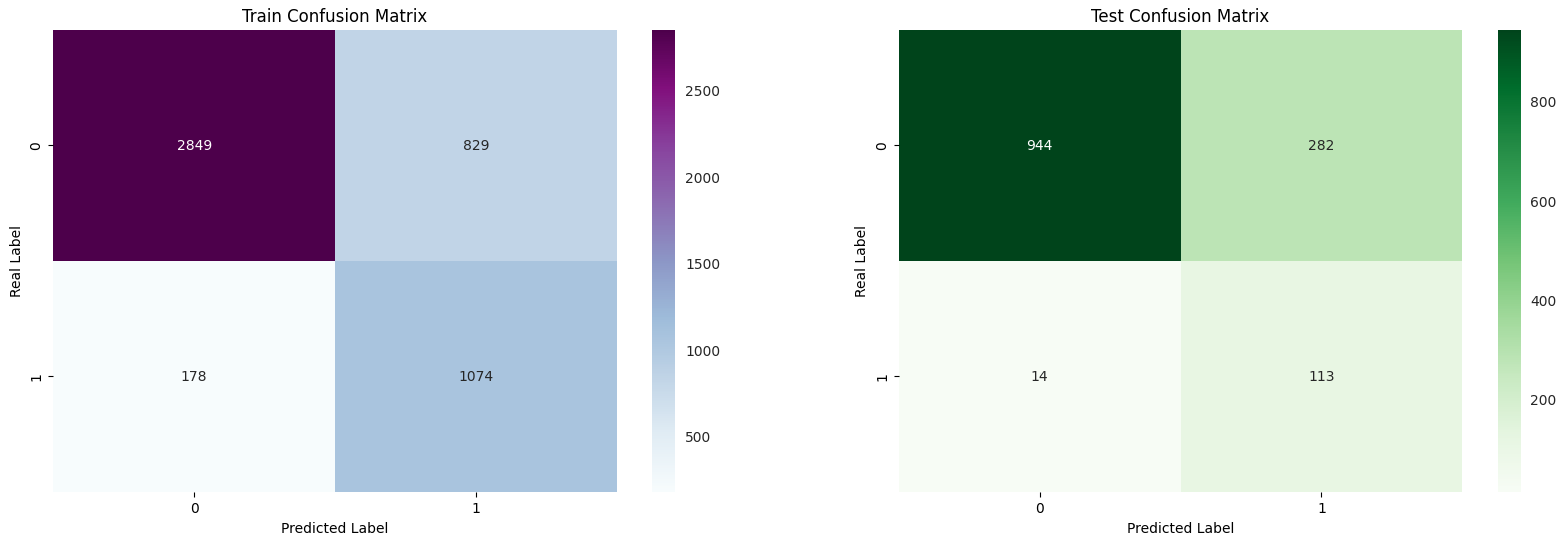



### Train AUC = 0.899566131926818
### Test AUC = 0.9205597872859694
### Model train accuracy is : 0.7957
### Model test accuracy is : 0.7812
### Model Train F1 Score is : 0.6808
### Model Test F1 Score is : 0.4330
### Model Train precision Score is : 0.5644
### Model Test precision Score is : 0.2861


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

tree.fit(X_train_ovsamp, y_train_ovsamp)

evaluate_model(tree, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

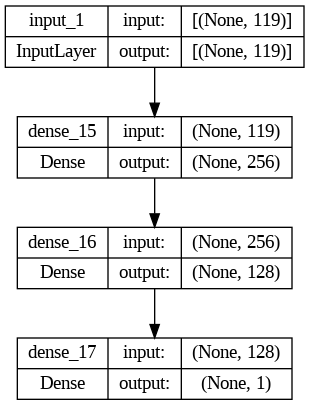

In [ ]:
#Callbacks (earlystopping, tensorboard, checkpoint, reduce_lr)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,verbose=1,restore_best_weights=True)
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
#MODEL

inpt=tf.keras.layers.Input((X_train_ovsamp.shape[1]))
d1=tf.keras.layers.Dense(256, activation='relu')(inpt)
d1=tf.keras.layers.Dense(128, activation='relu')(d1)

d2=tf.keras.layers.Dense(1,activation="sigmoid")(d1)

ann=tf.keras.Model(inputs=inpt,outputs=d2)

#Create the model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Ploting Architecture
plot_model(ann, to_file="arch.png", show_shapes=True, show_layer_names=True)

In [ ]:
# TRAINING
history_ann = ann.fit(X_train_ovsamp,y_train_ovsamp,validation_split=0.15, epochs =50, verbose=1, batch_size=32,
                   callbacks=[earlystopping,tensorboard,reduce_lr,checkpoint])

Epoch 1/50
116/131 [=========================>....] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8777
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to 


131/131 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8764 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/50
117/131 [=========================>....] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8774
Epoch 2: val_accuracy did not improve from 0.00000
131/131 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8778 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
131/131 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8778
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 3: val_accuracy did not improve from 0.00000
131/131 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8778 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/50
129/131 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8779Restoring model weights from the end of the best epoch

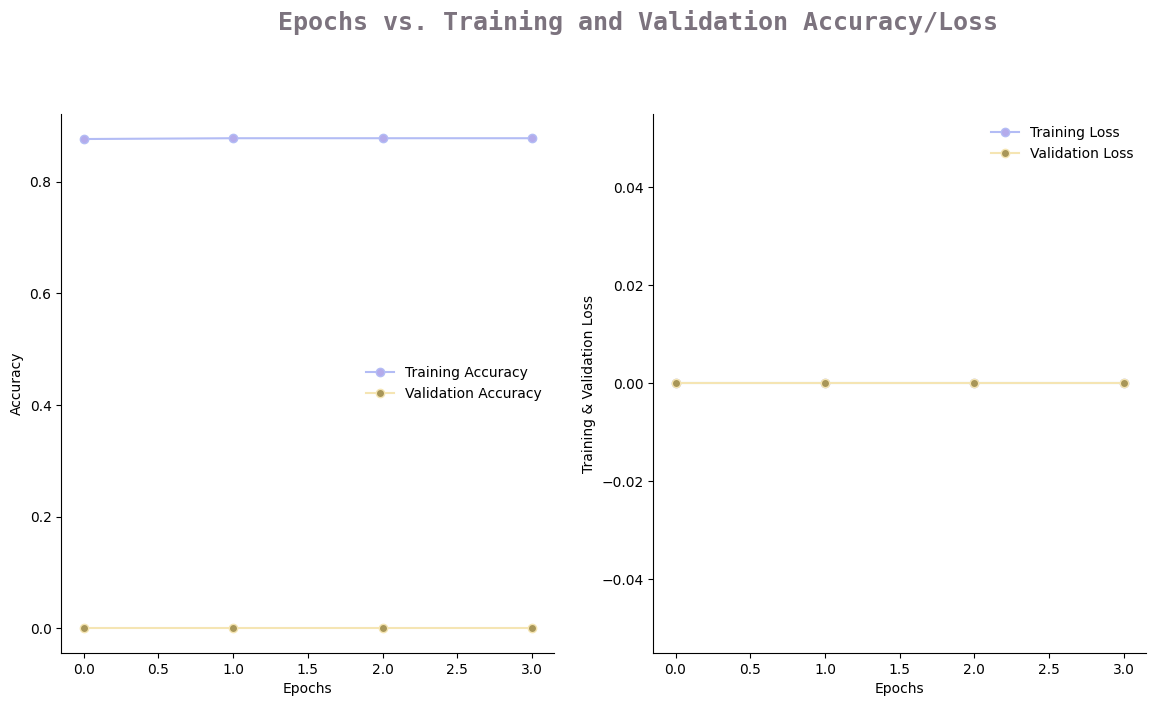

In [ ]:
#Visualize performance of the model
filterwarnings('ignore')

epochs = [i for i in range(4)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history_ann.history['accuracy']
train_loss = history_ann.history['loss']
val_acc = history_ann.history['val_accuracy']
val_loss = history_ann.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color="#5B505E",y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor="#B4ABEB",color="#B3BCF5",
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor="#A89659",color="#F5E5B3",
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor="#B4ABEB",color="#B3BCF5",
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor="#A89659",color="#F5E5B3",
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
#PREDICTION
pred = ann.predict(X_test_std)
pred = np.argmax(pred,axis=1)

print(classification_report(y_test,pred))

43/43 [==============================] - 0s 928us/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1226
           1       0.00      0.00      0.00       127

    accuracy                           0.91      1353
   macro avg       0.45      0.50      0.48      1353
weighted avg       0.82      0.91      0.86      1353

